#Analyzing Harvard Q Guide Data

In [9]:
import sys
import os
import pandas as pd
import numpy as np
import IPython
import csv
import time
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from IPython.display import display, HTML


In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
def readAndProcessCSV(datcsv):
    df = pd.read_csv(datcsv)
    df = df.replace({'False': np.nan}, regex=True) #because I when extracting
    df = df.replace({'FALSE': np.nan}, regex=True)
    df[['Std Workload Q']] = df[['Std Workload Q']].astype(float) #because dumb autoconversion fail
    return df
def getIntIfPossible(value):
    try:
        junk = int(value)
        return junk
    except ValueError:
        return False
    except TypeError: #usually None
        return False

In [4]:
df = readAndProcessCSV('allyears.csv')
lastspringdf = readAndProcessCSV('Std Post Spring Term 2015.csv')
lastfalldf = readAndProcessCSV('Std Post Fall Term 2014.csv')
bothdf = lastfalldf.append(lastspringdf)

In [46]:
assert len(df) > 18000

In [5]:
def getBetterPerspective(df):
    
    index = ['Overall', 'Std Workload', 'Recommend', 'Enrollment']
    columns = ['Mean', 'Median']
    
    ovr = [df['Overall Q'].mean(), df['Overall Q'].median()]
    wrk = [df['Std Workload Q'].mean(), df['Std Workload Q'].median()]
    rec = [df['Would Recommend Q'].mean(), df['Would Recommend Q'].median()]
    enr = [df['Enrollment'].mean(), df['Enrollment'].median()]
    
    dean = pd.DataFrame([ovr,wrk,rec,enr], index=index, columns=columns)
    
    studentover = []
    studentwork = []
    studentrecc = []
    studentenroll = []

    for _, course in df.iterrows():
        evs = getIntIfPossible(course['Evaluations'])
        if not evs:
            continue
        studentover.extend([course['Overall Q']] * evs)
        studentwork.extend([course['Std Workload Q']] * evs)
        studentrecc.extend([course['Would Recommend Q']] * evs)

        ens = getIntIfPossible(course['Enrollment'])
        if ens:
            studentenroll.extend([ens] * ens)
    so = pd.Series(studentover)
    sw = pd.Series(studentwork)
    sr = pd.Series(studentrecc)
    se = pd.Series(studentenroll)
    stud = pd.DataFrame([\
            [so.mean(), so.median()],\
            [sw.mean(), sw.median()],\
            [sr.mean(), sr.median()],\
            [se.mean(), se.median()]\
        ], index=index, columns=columns)
    return {'student': stud, 'dean': dean}

In [70]:


# GET PERSPECTIVES
# STUDENT, STUDENT-DIFF, DEAN, DEAN-DIFF


dacats = getSortedCategories(df,floor=200)
withall = dacats.insert(0, 'ALL')
allofit = getBetterPerspective(df)
allstuds = [allofit['student']['Mean']]
alldeans = [allofit['dean']['Mean']]
for c in dacats:
    per = getBetterPerspective(df[df['Course Category'] == c])
    allstuds.append(per['student']['Mean'])
    alldeans.append(per['dean']['Mean'])

st = pd.DataFrame(allstuds, index=withall)
print 'Student perspective'
display(st)

# see diffs from ALL
stcopy = st.copy()
for c in stcopy.columns:
    stcopy[c] = stcopy[c] - stcopy[c]['ALL']
display(stcopy)

de = pd.DataFrame(alldeans, index=withall)
print 'Dean perspective'
display(de)
decopy = de.copy()
for c in decopy.columns:
    decopy[c] = decopy[c] - decopy[c]['ALL']
display(decopy)

Student perspective


Overall  Std Workload  Recommend  Enrollment
ALL       3.949574      5.732011   4.044203  119.211200
FRSEMR    4.249723      3.018440   4.314942   11.680514
HIST      4.158280      6.159057   4.193849   41.612513
ECON      3.648042      5.882690   3.797580  224.220128
GOV       3.998018      5.698708   4.075166  101.105792
ENGLISH   4.228473      5.732224   4.307056   96.927470
EXPOS     4.038011      5.469952   4.085967   19.754477
PSY       4.107547      4.123359   4.231857  115.243675
MATH      3.979331      8.451262   3.981027   37.907263
VES       4.323457      7.195787   4.389570   18.123908
ANTHRO    4.019792      5.162175   4.157862   50.769974
MUSIC     4.290054      4.799854   4.357370   55.992893
SOCIOL    3.904128      4.876337   4.027733   88.893658
ENG-SCI   3.738725      7.370612   3.803180   36.123421
HAA       4.032978      4.546704   4.152947   98.424622
STAT      3.887709      7.200860   3.952730  124.864989
HISTSCI   4.007855      4.828399   4.116722   48.611614
COMPSCI   3.940955     10.700842   4.011488  208.845760
OEB       4.061727      4.176816   4.125758   46.614249
MCB       3.803934      5.579170   3.859893  116.600657
SLAVIC    4.316041      7.090415   4.375873   12.377976
SOC-STD   4.229475      7.971298   4.293481   68.666431
PHIL      4.151235      5.370636   4.124209   30.791197
FRENCH    4.221117      5.280165   4.313274   41.456305
PHYSICS   3.624616      9.322995   3.709492   47.051565
AFRAMER   3.913635      4.131031   4.136572   70.871361
RELIGION  4.168991      4.995586   4.232381   60.653502
CHEM      3.775259      8.171777   3.771689  138.491572

Overall  Std Workload  Recommend  Enrollment
ALL       0.000000      0.000000   0.000000    0.000000
FRSEMR    0.300149     -2.713571   0.270739 -107.530686
HIST      0.208705      0.427046   0.149646  -77.598687
ECON     -0.301533      0.150679  -0.246623  105.008928
GOV       0.048443     -0.033303   0.030962  -18.105408
ENGLISH   0.278899      0.000213   0.262853  -22.283730
EXPOS     0.088437     -0.262059   0.041764  -99.456723
PSY       0.157973     -1.608652   0.187654   -3.967525
MATH      0.029757      2.719251  -0.063177  -81.303937
VES       0.373883      1.463776   0.345366 -101.087292
ANTHRO    0.070218     -0.569836   0.113659  -68.441226
MUSIC     0.340479     -0.932157   0.313167  -63.218307
SOCIOL   -0.045447     -0.855674  -0.016470  -30.317542
ENG-SCI  -0.210850      1.638601  -0.241023  -83.087779
HAA       0.083404     -1.185307   0.108744  -20.786578
STAT     -0.061865      1.468849  -0.091473    5.653788
HISTSCI   0.058281     -0.903612   0.072519  -70.599586
COMPSCI  -0.008619      4.968831  -0.032715   89.634560
OEB       0.112152     -1.555195   0.081554  -72.596951
MCB      -0.145640     -0.152841  -0.184310   -2.610544
SLAVIC    0.366467      1.358404   0.331670 -106.833224
SOC-STD   0.279901      2.239287   0.249277  -50.544769
PHIL      0.201661     -0.361375   0.080006  -88.420003
FRENCH    0.271542     -0.451846   0.269071  -77.754895
PHYSICS  -0.324958      3.590984  -0.334711  -72.159636
AFRAMER  -0.035939     -1.600980   0.092368  -48.339839
RELIGION  0.219417     -0.736425   0.188178  -58.557698
CHEM     -0.174315      2.439766  -0.272514   19.280372

Dean perspective


Overall  Std Workload  Recommend  Enrollment
ALL       4.179606      6.062979   4.236366   24.697703
FRSEMR    4.240672      3.100747   4.303078   10.374067
HIST      4.292267      6.909062   4.314331   16.118644
ECON      4.017320      6.695122   4.087925   38.339499
GOV       4.166518      6.398661   4.227009   30.425223
ENGLISH   4.328407      6.266858   4.370588   25.121951
EXPOS     4.035693      5.453163   4.081928   14.463855
PSY       4.220949      5.004771   4.296443   27.964427
MATH      4.181414      7.775869   4.150607   23.309091
VES       4.395918      7.922653   4.457551   11.446939
ANTHRO    4.135699      6.419833   4.233820   17.062630
MUSIC     4.385034      5.702721   4.439456   17.229025
SOCIOL    4.035469      5.940596   4.136842   31.029748
ENG-SCI   3.870824      7.536321   3.924706   16.948235
HAA       4.245541      5.764968   4.326752   22.117834
STAT      4.012500      6.785852   4.055449   36.416667
HISTSCI   4.234615      5.672990   4.306731   20.532051
COMPSCI   4.053947      8.744884   4.076316   50.161184
OEB       4.286242      4.609060   4.328188   19.781879
MCB       3.972887      5.760915   4.024296   34.316901
SLAVIC    4.410112      6.765283   4.453933    7.550562
SOC-STD   4.361832      7.146947   4.367176   16.179389
PHIL      4.190909      5.739130   4.169048   18.588933
FRENCH    4.194048      5.799206   4.261905   21.932540
PHYSICS   3.957787      9.181967   4.037295   23.049180
AFRAMER   4.034177      5.162288   4.161603   24.206751
RELIGION  4.221101      5.899541   4.226606   15.912844
CHEM      3.783654      7.291748   3.838835   45.350962

Overall  Std Workload  Recommend  Enrollment
ALL       0.000000      0.000000   0.000000    0.000000
FRSEMR    0.061066     -2.962232   0.066712  -14.323636
HIST      0.112661      0.846083   0.077965   -8.579059
ECON     -0.162286      0.632143  -0.148441   13.641797
GOV      -0.013088      0.335682  -0.009357    5.727521
ENGLISH   0.148802      0.203879   0.134222    0.424249
EXPOS    -0.143913     -0.609816  -0.154438  -10.233847
PSY       0.041343     -1.058207   0.060077    3.266724
MATH      0.001808      1.712890  -0.085759   -1.388612
VES       0.216312      1.859674   0.221185  -13.250764
ANTHRO   -0.043907      0.356854  -0.002546   -7.635072
MUSIC     0.205428     -0.360258   0.203090   -7.468678
SOCIOL   -0.144137     -0.122383  -0.099524    6.332046
ENG-SCI  -0.308782      1.473342  -0.311660   -7.749467
HAA       0.065935     -0.298011   0.090386   -2.579868
STAT     -0.167106      0.722873  -0.180917   11.718964
HISTSCI   0.055009     -0.389989   0.070365   -4.165651
COMPSCI  -0.125659      2.681906  -0.160050   25.463482
OEB       0.106636     -1.453918   0.091822   -4.915823
MCB      -0.206719     -0.302063  -0.212070    9.619199
SLAVIC    0.230506      0.702304   0.217567  -17.147141
SOC-STD   0.182226      1.083968   0.130810   -8.518313
PHIL      0.011303     -0.323848  -0.067318   -6.108770
FRENCH    0.014442     -0.263773   0.025539   -2.765163
PHYSICS  -0.221819      3.118988  -0.199071   -1.648522
AFRAMER  -0.145429     -0.900691  -0.074763   -0.490952
RELIGION  0.041495     -0.163438  -0.009761   -8.784859
CHEM     -0.395952      1.228769  -0.397531   20.653259

In [10]:
def getPerspective(df):
    print 'Dean\'s perspective'
    print 'Overall Mean/Median:'
    print df['Overall Q'].mean(), df['Overall Q'].median()
    print 'Std Workload Mean/Median/Max:'
    print df['Std Workload Q'].mean(), df['Std Workload Q'].median(), df['Std Workload Q'].max()
    print 'Recommend Mean/Median:'
    print df['Would Recommend Q'].mean(), df['Would Recommend Q'].median()
    print 'Enrollments Mean/Median/Max:'
    print df['Enrollment'].mean(), df['Enrollment'].median(), df['Enrollment'].max()
    print '\n'
    print 'Student\'s perspective'
    
    studentover = []
    studentwork = []
    studentrecc = []
    studentenroll = []

    for _, course in df.iterrows():
        evs = getIntIfPossible(course['Evaluations'])
        if not evs:
            continue
        studentover.extend([course['Overall Q']] * evs)
        studentwork.extend([course['Std Workload Q']] * evs)
        studentrecc.extend([course['Would Recommend Q']] * evs)

        ens = getIntIfPossible(course['Enrollment'])
        if ens:
            studentenroll.extend([ens] * ens)
    so = pd.Series(studentover)
    sw = pd.Series(studentwork)
    sr = pd.Series(studentrecc)
    se = pd.Series(studentenroll)
    print 'Overall Mean/Median:'
    print so.mean(), so.median()
    print 'Std Workload Mean/Median:'
    print sw.mean(), sw.median()
    print 'Recommend Mean/Median:'
    print sr.mean(), sr.median()
    print 'Enrollments Mean/Median:'
    print se.mean(), se.median()

def getCategories(df):
    return df['Course Category'].unique()

def getSortedCategories(df, floor=0):
    ab = df['Course Category'].value_counts()
    if floor:
        ab = ab[ab > floor]#[v for v in ab if v >= floor]# [a for a in A if a not in subset_of_A] [x if x>=100 for x in allcats]
    return ab.keys()
def getAllPerspectivesForDF(df, floor=200):
    dacats = getSortedCategories(df,floor=floor)
    withall = dacats.insert(0, 'ALL')
    allofit = getBetterPerspective(df)
    allstuds = [allofit['student']['Mean']]
    alldeans = [allofit['dean']['Mean']]
    for c in dacats:
        per = getBetterPerspective(df[df['Course Category'] == c])
        allstuds.append(per['student']['Mean'])
        alldeans.append(per['dean']['Mean'])

    st = pd.DataFrame(allstuds, index=withall)
    print 'Student perspective'
    display(st)

    # see diffs from ALL
    stcopy = st.copy()
    for c in stcopy.columns:
        stcopy[c] = stcopy[c] - stcopy[c]['ALL']
    display(stcopy)

    de = pd.DataFrame(alldeans, index=withall)
    print 'Dean perspective'
    display(de)
    decopy = de.copy()
    for c in decopy.columns:
        decopy[c] = decopy[c] - decopy[c]['ALL']
    display(decopy)

In [11]:
getAllPerspectivesForDF(bothdf, floor=50)

Student perspective


Overall  Std Workload  Recommend  Enrollment
ALL      3.994162      5.951577   4.068595  111.522899
EXPOS    3.984022      5.414250   3.978655   13.986726
FRSEMR   4.304658      2.750904   4.336977   11.757216
ECON     3.741520      6.439227   3.830075  262.697198
HIST     4.170638      5.392963   4.181850   51.922409
GOV      4.011207      5.357768   4.048793   87.897032
ENGLISH  4.311397      5.559007   4.385662   46.048433
MUSIC    4.468801      4.469891   4.525749   34.980198
MATH     4.071459      9.147650   4.051331   39.093795
SOCIOL   3.940609      4.491992   3.996537   47.267829
PSY      4.251668      3.550326   4.361188  102.889793
ANTHRO   4.088496      4.861504   4.161504   38.742152

Overall  Std Workload  Recommend  Enrollment
ALL      0.000000      0.000000   0.000000    0.000000
EXPOS   -0.010140     -0.537326  -0.089940  -97.536173
FRSEMR   0.310495     -3.200673   0.268382  -99.765683
ECON    -0.252642      0.487650  -0.238521  151.174299
HIST     0.176475     -0.558614   0.113255  -59.600490
GOV      0.017045     -0.593809  -0.019803  -23.625867
ENGLISH  0.317235     -0.392569   0.317067  -65.474466
MUSIC    0.474639     -1.481686   0.457154  -76.542701
MATH     0.077297      3.196073  -0.017264  -72.429104
SOCIOL  -0.053554     -1.459585  -0.072058  -64.255070
PSY      0.257506     -2.401251   0.292593   -8.633106
ANTHRO   0.094333     -1.090072   0.092909  -72.780746

Dean perspective


Overall  Std Workload  Recommend  Enrollment
ALL      4.242504      5.930902   4.275168   23.657989
EXPOS    4.009848      5.399242   3.991667   13.696970
FRSEMR   4.288393      2.809910   4.316071   10.517857
ECON     4.200000      7.220388   4.171171   38.261261
HIST     4.362136      6.403960   4.361165   17.893204
GOV      4.219565      5.695652   4.241304   29.663043
ENGLISH  4.342623      5.606557   4.398361   23.016393
MUSIC    4.546667      5.513333   4.623333   15.150000
MATH     4.240351      8.449091   4.208772   24.315789
SOCIOL   4.152727      5.529630   4.220000   22.945455
PSY      4.298148      4.198113   4.366667   29.574074
ANTHRO   4.243396      6.284906   4.241509   16.830189

Overall  Std Workload  Recommend  Enrollment
ALL      0.000000      0.000000   0.000000    0.000000
EXPOS   -0.232656     -0.531660  -0.283502   -9.961020
FRSEMR   0.045888     -3.120993   0.040903  -13.140132
ECON    -0.042504      1.289486  -0.103997   14.603272
HIST     0.119631      0.473058   0.085997   -5.764785
GOV     -0.022939     -0.235250  -0.033864    6.005054
ENGLISH  0.100118     -0.324345   0.123192   -0.641596
MUSIC    0.304162     -0.417569   0.348165   -8.507989
MATH    -0.002154      2.518188  -0.066396    0.657800
SOCIOL  -0.089777     -0.401273  -0.055168   -0.712535
PSY      0.055644     -1.732789   0.091498    5.916085
ANTHRO   0.000892      0.354003  -0.033659   -6.827801

In [32]:
getPerspective(df)

Dean's perspective
Overall Mean/Median:
4.18734374132 4.2
Std Workload Mean/Median/Max:
6.0580593022 5.7 30.3
Recommend Mean/Median:
4.24152024021 4.3
Enrollments Mean/Median/Max:
24.5006110432 12.0 1072.0


Student's perspective
Overall Mean/Median:
3.95373319684 4.0
Std Workload Mean/Median/Max:
5.73263380242 5.3
Recommend Mean/Median:
4.04669122583 4.1
Enrollments Mean/Median/Max:
118.494875981 50.0


######Overall Stats
These are the stats for Fall 2007 to Spring 2015.

We see with each course weighed equally, the average Q score is approximately 4.19, with worload hovering at around 6. Interestingly, Would Recommend Q scores are slightly higher than the overall Q scores. The average for each class is 24 students, with a median of 12. This is with each class weighed equally. As shown in Stat 110, the picture can be different when evaluated from the means encountered by those going to class.

Given equal weight to each student, the overall and would recommend Q scores fall by 0.2 points. Workload falls by about 0.3 hours. And enrollment increases drastically to mean of 118, and median of 50.

###Categories

In [12]:
def getCategoryInfo(df, enrollmin = 20):
    cats = df.columns[4:15]
    cats = np.delete(cats, 6)
    for cat in cats:
        print 'Max ' + cat
        maxcat = df
        if cat != 'Enrollment':
            maxcat = maxcat[maxcat['Enrollment'] >= enrollmin]
        maxcat = maxcat[maxcat[cat] == maxcat[cat].max()]
        maxcat = maxcat.sort(['Year', 'Term'], ascending = [True, True])
    #    springsorted = lastspringdf.sort(['Workload Q', 'Overall Q', 'Would Recommend Q', 'Evaluations'], ascending=[True, False, False, False]

        display(pd.concat([maxcat['Course Category'], maxcat['Course Number'], maxcat['Course Title'],\
                        maxcat[cat], maxcat['Term'], maxcat['Year']], axis=1, keys=['category', 'num',\
                                                                                   'title', cat, 'term', 'year']))
        display(maxcat['Course Category'].value_counts())
        print 'Min ' + cat
        mincat = df
        if cat != 'Enrollment':
            mincat = mincat[mincat['Enrollment'] >= enrollmin]
        mincat = mincat[mincat[cat] == mincat[cat].min()]
        mincat = mincat.sort(['Year', 'Term'], ascending = [True, True])

        display(pd.concat([mincat['Course Category'], mincat['Course Number'], mincat['Course Title'],\
                        mincat[cat], mincat['Term'], mincat['Year']], axis=1, keys=['category', 'num',\
                                                                                   'title', cat, 'term', 'year']))
        display(mincat['Course Category'].value_counts())

In [77]:
getCategoryInfo(df, enrollmin = 10)

Max Overall Q


category            num                                              title  Overall Q    term  year
106       CHNSE      CHNSE AAB                Intensive Elementary Modern Chinese          5    Fall  2006
119     COMPLIT    COMPLIT 275             Theory of Narrative: Conference Course          5    Fall  2006
228     ENGLISH    ENGLISH 154  19th-Century English Poetry: Wordsworth to Ten...          5    Fall  2006
235     ENGLISH   ENGLISH 195X           Contemporary African American Literature          5    Fall  2006
242     ENGLISH    ENGLISH 282            Theories of Modernism: Graduate Seminar          5    Fall  2006
251     ENGLISH   ENGLISH 90WJ                           The Poetry of John Keats          5    Fall  2006
259     ENGLISH    ENGLISH CTR                           Advanced Fiction Writing          5    Fall  2006
309      FRSEMR     FRSEMR 25N  Understanding Psychological Development, Disor...          5    Fall  2006
323      FRSEMR     FRSEMR 32K                         The Poetry of Walt Whitman          5    Fall  2006
446         HAA       HAA 272W    Post WW II European Art: France, Italy, Germany          5    Fall  2006
447         HAA       HAA 275W                                          The Thing          5    Fall  2006
517     HISTSCI    HISTSCI 212  The Sciences of Life, Medicine and the Body in...          5    Fall  2006
710        PHIL       PHIL 155                                   Carnap and Quine          5    Fall  2006
761         PSY      PSY 2530R                   Mental Control: Research Seminar          5    Fall  2006
823     SOC-STD   SOC-STD 98FU  Practicing Democracy: Leadership, Community, P...          5    Fall  2006
917         VES       VES 51BR           Nonfiction Video Projects: Studio Course          5    Fall  2006
1081      DRAMA       DRAMA 36                               Practical Aesthetics          5    Fall  2007
1196    ENGLISH    ENGLISH CPR                                     Poetry Writing          5    Fall  2007
1236     FRSEMR     FRSEMR 22I                             The Science of Sailing          5    Fall  2007
1341        GOV       GOV 2791            Comparative Foreign and Security Policy          5    Fall  2007
1352        GOV       GOV 90SP                                      Future of War          5    Fall  2007
1465    HISTSCI    HISTSCI 157      Sociological Topics in the History of Science          5    Fall  2007
1565       MATH      MATH 233A                                Theory of Schemes I          5    Fall  2007
1570       MATH       MATH 282              Introduction to Seiberg-Witten Theory          5    Fall  2007
1571       MATH       MATH 283                              Topics in Knot Theory          5    Fall  2007
1697        PSY      PSY 2530R                   Mental Control: Research Seminar          5    Fall  2007
1873        VES         VES 99     Tutorial - Senior Year (Thesis/Senior Project)          5    Fall  2007
9413    AFRAMER    AFRAMER 131           African-American Literature to the 1920s          5  Spring  2007
9481    BIOLOGY  BIOLOGY 95HFJ                                 The Sleeping Brain          5  Spring  2007
9601       ECON      ECON 2728                                 Behavioral Finance          5  Spring  2007
...         ...            ...                                                ...        ...     ...   ...
17200       GOV       GOV 2151                The Comparative Politics of Eurasia          5  Spring  2014
17208       GOV       GOV 94AL                        Global Distributive Justice          5  Spring  2014
17333  HSEMR-WI    HSEMR-WI 75                                    The Laws of War          5  Spring  2014
17349     JAPAN     JAPAN 130B                           Intermediate Japanese II          5  Spring  2014
17408      MATH     MATH 232BR                              Algebraic Geometry II          5  Spring  2014
17418      MATH      MATH 280Y                  

MATH        34
ENGLISH     34
FRSEMR      25
ECON        18
VES         14
GOV         11
PSY          9
DRAMA        8
NEUROBIO     6
HISTSCI      6
HIST         6
HAA          5
CHNSE        4
AFRAMER      4
SOCIOL       4
ANTHRO       4
OEB          3
WOMGEN       3
HIST-LIT     3
MUSIC        3
EASTD        2
E-PSCI       2
STAT         2
EXPOS        2
ARABIC       2
SPANSH       2
LATIN        1
PHIL         1
RELIGION     1
ESPP         1
LITERTRE     1
COMPLIT      1
BIOLOGY      1
PERSIAN      1
PHYSICS      1
JAPAN        1
SCRB         1
IMUIL        1
AESTHINT     1
CELTIC       1
MOD-HEB      1
CULTBLF      1
MICROBI      1
HEB          1
COMPSCI      1
GENETIC      1
GERMAN       1
SOC-STD      1
KOREAN       1
HSEMR-WI     1
dtype: int64

Min Overall Q


category           num                                 title  Overall Q    term  year
10370   ARABIC  ARABIC 241BR  Modern Arabic Literature and Culture        1.3  Spring  2008
12365     CHEM      CHEM 161            Statistical Thermodynamics        1.3  Spring  2010

CHEM      1
ARABIC    1
dtype: int64

Max Workload Q


category          num              title  Workload Q    term  year
17985  COMPSCI  COMPSCI 161  Operating Systems        30.3  Spring  2015

COMPSCI    1
dtype: int64

Min Workload Q


category             num                                              title  Workload Q    term  year
69       ASTRON    ASTRON 301HF                                     Research Forum           1    Fall  2006
245     ENGLISH     ENGLISH 350                                Teaching Colloquium           1    Fall  2006
276    FOR-CULT     FOR-CULT 80                                      Korea at 2100           1    Fall  2006
306      FRSEMR      FRSEMR 24Y                  Pharmaceuticals and Global Health           1    Fall  2006
308      FRSEMR      FRSEMR 25K                               You Are What You Eat           1    Fall  2006
313      FRSEMR      FRSEMR 25Z  Stress and Disease (Biobehavioral Aspects of H...           1    Fall  2006
341      FRSEMR      FRSEMR 41E  The American Creed: Exceptionalism and Nationa...           1    Fall  2006
525     HLTHPOL  HLTHPOL 3040HF                  Research Seminar in Health Policy           1    Fall  2006
995      ASTRON    ASTRON 301HF                                     Research Forum           1    Fall  2007
1236     FRSEMR      FRSEMR 22I                             The Science of Sailing           1    Fall  2007
1238     FRSEMR      FRSEMR 23Z                             A Short History of DNA           1    Fall  2007
1251     FRSEMR      FRSEMR 31J                           Skepticism and Knowledge           1    Fall  2007
1568       MATH        MATH 265                  Infinite Dimensional Lie Algebras           1    Fall  2007
1570       MATH        MATH 282              Introduction to Seiberg-Witten Theory           1    Fall  2007
1571       MATH        MATH 283                              Topics in Knot Theory           1    Fall  2007
1572       MATH        MATH 288                                 Algebraic K-Theory           1    Fall  2007
1728    ROM-STD      ROM-STD 79       Romance Languages in Comparative Perspective           1    Fall  2007
1789     SOCIOL    SOCIOL 300HF                      Race, Identity and Inequality           1    Fall  2007
9713     FRSEMR      FRSEMR 21V                 The Weirdness of Quantum Mechanics           1  Spring  2007
9742     FRSEMR      FRSEMR 41U                                            Museums           1  Spring  2007
10013      MATH        MATH 268                                Motivic Integration           1  Spring  2007
2032      DRAMA       DRAMA 118                       Introduction to Stage Combat           1    Fall  2008
2197     FRSEMR      FRSEMR 22Z    Quantitative Methods in Public Policy Decisions           1    Fall  2008
2206     FRSEMR      FRSEMR 25G  The Impact of Infectious Diseases on History a...           1    Fall  2008
10379    ASTRON    ASTRON 301HF                                     Research Forum           1  Spring  2008
10465    E-PSCI     E-PSCI 281R                     Great Papers in Earth Sciences           1  Spring  2008
10525   ENG-SCI     ENG-SCI 109                                   Science Fictions           1  Spring  2008
10627    FRSEMR      FRSEMR 22J                             Seeing by Spectroscopy           1  Spring  2008
10629    FRSEMR      FRSEMR 22M                                    The Human Brain           1  Spring  2008
10645    FRSEMR      FRSEMR 36M                                          Noisy Art           1  Spring  2008
...         ...             ...                                                ...         ...     ...   ...
14838    FRSEMR      FRSEMR 26S  Mathematical Structures and G�_del's Completen...           1  Spring  2012
14839    FRSEMR      FRSEMR 26W  The Biology and Science of Cancer and Its Trea...           1  Spring  2012
14847    FRSEMR      FRSEMR 34Z  Pressing the Page: Making Art with Letters, Pa...           1  Spring  2012
15003      HIST     HIST 3920HF                   Colloquium on Teaching Practices           1  Spring  2012
7231     ASTRON    ASTRON 301HF                                       Journal Club 

FRSEMR      48
MATH        10
ASTRON       9
ECON         7
HIST         4
DRAMA        4
MED-SCI      3
SOCIOL       3
CHEM         3
STAT         2
NEUROBIO     2
ENGLISH      2
HAA          2
MCB          1
HLTHPOL      1
E-PSCI       1
IMUIL        1
ENG-SCI      1
GENETIC      1
CELLBIO      1
LING         1
ROM-STD      1
FOR-CULT     1
dtype: int64

Max Std Workload Q


category          num              title  Std Workload Q    term  year
17985  COMPSCI  COMPSCI 161  Operating Systems            30.3  Spring  2015

COMPSCI    1
dtype: int64

Min Std Workload Q


category           num                                      title  Std Workload Q    term  year
8375    ASTRON  ASTRON 301HF                               Journal Club               1    Fall  2014
8913      HIST   HIST 3920HF           Colloquium on Teaching Practices               1    Fall  2014
18061     ECON     ECON 2001  Research in Behavior in Games and Markets               1  Spring  2015
18575      MCB     MCB 350QC                       Scientific Integrity               1  Spring  2015
18875     STAT   STAT 300HFR                     Research in Statistics               1  Spring  2015

ASTRON    1
MCB       1
ECON      1
STAT      1
HIST      1
dtype: int64

Max Would Recommend Q


category              num                                              title  Would Recommend Q    term  year
110     CHNSLIT      CHNSLIT 132                                         Chinatowns                  5    Fall  2006
119     COMPLIT      COMPLIT 275             Theory of Narrative: Conference Course                  5    Fall  2006
134       DRAMA         DRAMA 10                                   Beginning Acting                  5    Fall  2006
228     ENGLISH      ENGLISH 154  19th-Century English Poetry: Wordsworth to Ten...                  5    Fall  2006
235     ENGLISH     ENGLISH 195X           Contemporary African American Literature                  5    Fall  2006
242     ENGLISH      ENGLISH 282            Theories of Modernism: Graduate Seminar                  5    Fall  2006
251     ENGLISH     ENGLISH 90WJ                           The Poetry of John Keats                  5    Fall  2006
259     ENGLISH      ENGLISH CTR                           Advanced Fiction Writing                  5    Fall  2006
307      FRSEMR       FRSEMR 25G  The Impact of Infectious Diseases on History a...                  5    Fall  2006
309      FRSEMR       FRSEMR 25N  Understanding Psychological Development, Disor...                  5    Fall  2006
317      FRSEMR       FRSEMR 26Q                    Testosterone and Human Behavior                  5    Fall  2006
447         HAA         HAA 275W                                          The Thing                  5    Fall  2006
514     HISTSCI      HISTSCI 182                 Science, Modernity, and Discontent                  5    Fall  2006
593         LIT          LIT 99A                             Tutorial - Senior Year                  5    Fall  2006
683       MUSIC        MUSIC 93R                    Supervised Reading and Research                  5    Fall  2006
710        PHIL         PHIL 155                                   Carnap and Quine                  5    Fall  2006
761         PSY        PSY 2530R                   Mental Control: Research Seminar                  5    Fall  2006
764         PSY         PSY 980V                               The Insanity Defense                  5    Fall  2006
821     SOC-STD     SOC-STD 98CD                             American Social Policy                  5    Fall  2006
823     SOC-STD     SOC-STD 98FU  Practicing Democracy: Leadership, Community, P...                  5    Fall  2006
858      SOCIOL        SOCIOL 99                                    Senior Tutorial                  5    Fall  2006
904         VES         VES 15AR                          Silkscreen: Studio Course                  5    Fall  2006
915         VES           VES 50          Fundamentals of Filmmaking: Studio Course                  5    Fall  2006
917         VES         VES 51BR           Nonfiction Video Projects: Studio Course                  5    Fall  2006
1000    BIOLOGY      BIOLOGY 99R                                Supervised Research                  5    Fall  2007
1196    ENGLISH      ENGLISH CPR                                     Poetry Writing                  5    Fall  2007
1199    ENGLISH      ENGLISH CTR                           Advanced Fiction Writing                  5    Fall  2007
1203       ESPP         ESPP 90J         Environmental Crises and Population Flight                  5    Fall  2007
1206      EXPOS         EXPOS 50                                Advanced Writing 50                  5    Fall  2007
1236     FRSEMR       FRSEMR 22I                             The Science of Sailing                  5    Fall  2007
...         ...              ...                                                ...                ...     ...   ...
17793       VES         VES 152R         Intermediate Video Workshop: Studio Course                  5  Spring  2014
17824    WOMGEN      WOMGEN 1234  A Voice of One's Own: Creative Writing in Wome...                  5  Spring  2014
17859   AFRAMER      AFRAMER 

ENGLISH     47
FRSEMR      47
VES         26
MATH        25
DRAMA       14
ECON        14
PSY         12
GOV         11
MUSIC       10
OEB         10
SOCIOL       7
HIST         7
HAA          6
HISTSCI      6
NEUROBIO     6
ANTHRO       6
EXPOS        5
SOC-STD      5
WOMGEN       4
HIST-LIT     4
SPANSH       4
HEB          4
SCRB         4
LITERTRE     3
STAT         3
SLAVIC       3
AFRAMER      3
ARABIC       2
EASTD        2
SANSKRIT     2
GENETIC      2
ESPP         2
CHNSE        1
LIT          1
FRENCH       1
COMPLIT      1
HINDI        1
CLASPHIL     1
ITAL         1
BIOLOGY      1
PHIL         1
JAPNHIST     1
CHNSLIT      1
ISLAMCIV     1
KOREAN       1
MCB          1
FOLKMYTH     1
CELTIC       1
PHYSICS      1
BBS          1
APMTH        1
COMPSCI      1
GERMAN       1
E-PSCI       1
ASTRON       1
PERSIAN      1
HIND-URD     1
SWEDISH      1
dtype: int64

Min Would Recommend Q


category       num                       title  Would Recommend Q    term  year
12365     CHEM  CHEM 161  Statistical Thermodynamics                1.4  Spring  2010

CHEM    1
dtype: int64

Max Enrollment


category          num    title  Enrollment  term  year
1606  MOR-REAS  MOR-REAS 22  Justice        1072  Fall  2007

MOR-REAS    1
dtype: int64

Min Enrollment


category            num                                              title  Enrollment    term  year
9952   JEWISHST   JEWISHST 142  Gender Roles and the Role of Gender: Jewish So...           1  Spring  2007
2798        TWI      TWI 101AR                                     Reading in Twi           1    Fall  2008
2947        BPH        BPH 206                    Advanced Respiratory Physiology           1    Fall  2009
2993   CLASARCH   CLASARCH 97R                              Classical Archaeology           1    Fall  2009
3349       HIST      HIST 1166  Marriage, Sex, and Family in Western Europe, 1...           1    Fall  2009
3645    PHYSICS    PHYSICS 136  Physics of NMR Imaging with Medical Applicatio...           1    Fall  2009
11346    CELTIC    CELTIC 129R                          Intermediate Modern Welsh           1  Spring  2009
11609    FRSEMR     FRSEMR 23F       Uncertainty, Probability, and Climate Change           1  Spring  2009
11873     LATIN      LATIN AAB                        Beginning Latin (Intensive)           1  Spring  2009
11951    MODGRK     MODGRK 100  Advanced Modern Greek: Introduction to Modern ...           1  Spring  2009
11953    MODGRK       MODGRK B  Intermediate Modern Greek: Language and Civili...           1  Spring  2009
12114    SLAVIC      SLAVIC 98                             Tutorial - Junior Year           1  Spring  2009
3953     CELTIC     CELTIC 128                       Introduction to Modern Welsh           1    Fall  2010
4445       HIST      HIST 1618           Telling Lives in Asia: Conference Course           1    Fall  2010
4457       HIST      HIST 2133    Studies in Tudor and Stuart History: Proseminar           1    Fall  2010
4708    PHYSICS    PHYSICS 136                         Physics of Medical Imaging           1    Fall  2010
4807     SLAVIC      SLAVIC GA                              Beginning Ukrainian I           1    Fall  2010
4897        TWI      TWI 101AR                                     Reading in Twi           1    Fall  2010
12666    FRSEMR     FRSEMR 42T            The Age of Reason: Science and Religion           1  Spring  2010
12802      HIST      HIST 2110  Problems in Late Medieval, Renaissance/Reforma...           1  Spring  2010
12815      HIST       HIST 70G                  Modern Jewish Religious Movements           1  Spring  2010
12817      HIST       HIST 72F       East European Identities: Russia and Ukraine           1  Spring  2010
12976  MEDGREEK   MEDGREEK 195         Byzantine Saints' Lives of the 7th Century           1  Spring  2010
12977  MEDLATIN   MEDLATIN 110            Latin Literature of the Twelfth Century           1  Spring  2010
12989    MODGRK       MODGRK B  Intermediate Modern Greek: Language and Civili...           1  Spring  2010
13085   PHYSICS   PHYSICS 289R  Euclidean Random Fields, Relativistic Quantum ...           1  Spring  2010
13165    SLAVIC     SLAVIC 151        Experiments in Reading: Chekhov and Nabokov           1  Spring  2010
13176    SLAVIC      SLAVIC CC                               Intermediate Czech I           1  Spring  2010
13178    SLAVIC      SLAVIC GB                             Beginning Ukrainian II           1  Spring  2010
5571       HIST       HIST 81I                    Holland in the Age of Rembrandt           1    Fall  2011
...         ...            ...                                                ...         ...     ...   ...
16871      CZCH         CZCH B                                 Intermediate Czech           1  Spring  2014
16973   ENG-SCI    ENG-SCI 224     Laboratory in Engineering and Physical Biology           1  Spring  2014
16976   ENG-SCI    ENG-SCI 230                        Advanced Tissue Engineering           1  Spring  2014
17131    FRSEMR     FRSEMR 30I        Noam Chomsky and the Science of Linguistics           1  Spring  2014
17172    GIKUYU       GIKUYU A                                  Elementary Gikuyu           1  Spring  2014
17304      

SLAVIC      19
HIST        16
NEP          7
FRSEMR       6
VIETNAM      4
MODGRK       4
CELTIC       4
SAS          4
TWI          4
MEDGREEK     3
ENG-SCI      3
PHYSICS      3
OEB          3
PLSH         3
TIBET        3
THI          3
UYGHUR       3
PALI         2
CZCH         2
LATIN        2
APPHY        2
RELIGION     2
YORUBA       2
TIBETAN      2
MCB          2
GIKUYU       2
JAPNLIT      2
VES          2
CLS-STDY     1
IRISH        1
FOLKMYTH     1
UKRA         1
SANSKRIT     1
JEWISHST     1
SOC-STD      1
BPH          1
CHNSE        1
BE           1
MEDLATIN     1
ECON         1
HEB          1
APCOMP       1
SALLC        1
CLASARCH     1
WELSH        1
CHNSHIS      1
BIOSTAT      1
MICROBI      1
DRB          1
E-PSCI       1
TAM          1
ASTRON       1
EASTD        1
APMTH        1
dtype: int64

Max Evaluations


category      num                    title  Evaluations  term  year
4045     ECON  ECON 10  Principles of Economics          741  Fall  2010

ECON    1
dtype: int64

Min Evaluations


category             num                                              title  Evaluations    term  year
194        ECON       ECON 985H                      Research in Financial Markets            1    Fall  2006
242     ENGLISH     ENGLISH 282            Theories of Modernism: Graduate Seminar            1    Fall  2006
447         HAA        HAA 275W                                          The Thing            1    Fall  2006
716        PHIL       PHIL 274Z               Contemporary Ethical Theory: Seminar            1    Fall  2006
855      SOCIOL     SOCIOL 296A       Proseminar on Inequality and Social Policy I            1    Fall  2006
1568       MATH        MATH 265                  Infinite Dimensional Lie Algebras            1    Fall  2007
1569       MATH        MATH 273        Topics in Analysis and Mathematical Physics            1    Fall  2007
1570       MATH        MATH 282              Introduction to Seiberg-Witten Theory            1    Fall  2007
1571       MATH        MATH 283                              Topics in Knot Theory            1    Fall  2007
1782     SOCIOL      SOCIOL 204                       Sociological Theory: Seminar            1    Fall  2007
10013      MATH        MATH 268                                Motivic Integration            1  Spring  2007
2765     SOCIOL    SOCIOL 300HF              Workshop on Race: Black Youth Culture            1    Fall  2008
10731       HAA        HAA 100R                         Sophomore Excursion Course            1  Spring  2008
10748       HAA          HAA 99                             Tutorial - Senior Year            1  Spring  2008
10925      MATH      MATH 233BR                               Theory of Schemes II            1  Spring  2008
10931      MATH        MATH 275  Multiplicity-Free Representations: Complex Geo...            1  Spring  2008
4600       MATH       MATH 294X  Complex Manifolds, Its Complex Structure and t...            1    Fall  2010
5177       ECON       ECON 2480  Research in Public Economics and Fiscal Policy...            1    Fall  2011
5689       MATH       MATH 254Y                           Geometry with Valuations            1    Fall  2011
13570      ECON       ECON 2480  Research in Public Economics and Fiscal Policy...            1  Spring  2011
14051      MATH       MATH 277X        Mapping Class Groups and Teichmuller Theory            1  Spring  2011
14649      ECON       ECON 2480  Research in Public Economics and Fiscal Policy...            1  Spring  2012
15196  NEUROBIO  NEUROBIO 306QC                Quantitative Methods for Biologists            1  Spring  2012
15771      ECON       ECON 2480  Research in Public Economics and Fiscal Policy...            1  Spring  2013
8520       ECON       ECON 2001          Research in Behavior in Games and Markets            1    Fall  2014
17408      MATH      MATH 232BR                              Algebraic Geometry II            1  Spring  2014
17418      MATH       MATH 280Y                      Topics in Symplectic Geometry            1  Spring  2014
18547      MATH        MATH 261  Topics in Symplectic Geometry: Langrangian Int...            1  Spring  2015

MATH        13
ECON         6
SOCIOL       3
HAA          3
NEUROBIO     1
PHIL         1
ENGLISH      1
dtype: int64

Max Materials Q


category           num                                              title  Materials Q    term  year
38       ANTHRO   ANTHRO 2680                          Globalization and Culture            5    Fall  2006
61       ARABIC   ARABIC 231A                                  Qur'an I: Seminar            5    Fall  2006
119     COMPLIT   COMPLIT 275             Theory of Narrative: Conference Course            5    Fall  2006
173        ECON     ECON 2070                           Economics of Information            5    Fall  2006
228     ENGLISH   ENGLISH 154  19th-Century English Poetry: Wordsworth to Ten...            5    Fall  2006
242     ENGLISH   ENGLISH 282            Theories of Modernism: Graduate Seminar            5    Fall  2006
251     ENGLISH  ENGLISH 90WJ                           The Poetry of John Keats            5    Fall  2006
259     ENGLISH   ENGLISH CTR                           Advanced Fiction Writing            5    Fall  2006
323      FRSEMR    FRSEMR 32K                         The Poetry of Walt Whitman            5    Fall  2006
334      FRSEMR    FRSEMR 39K  Literature Humanities: The Foundation Texts of...            5    Fall  2006
514     HISTSCI   HISTSCI 182                 Science, Modernity, and Discontent            5    Fall  2006
517     HISTSCI   HISTSCI 212  The Sciences of Life, Medicine and the Body in...            5    Fall  2006
592         LIT       LIT 98A                             Tutorial - Junior Year            5    Fall  2006
593         LIT       LIT 99A                             Tutorial - Senior Year            5    Fall  2006
683       MUSIC     MUSIC 93R                    Supervised Reading and Research            5    Fall  2006
710        PHIL      PHIL 155                                   Carnap and Quine            5    Fall  2006
761         PSY     PSY 2530R                   Mental Control: Research Seminar            5    Fall  2006
858      SOCIOL     SOCIOL 99                                    Senior Tutorial            5    Fall  2006
904         VES      VES 15AR                          Silkscreen: Studio Course            5    Fall  2006
917         VES      VES 51BR           Nonfiction Video Projects: Studio Course            5    Fall  2006
1000    BIOLOGY   BIOLOGY 99R                                Supervised Research            5    Fall  2007
1199    ENGLISH   ENGLISH CTR                           Advanced Fiction Writing            5    Fall  2007
1260     FRSEMR    FRSEMR 35I                                   Drawing the Body            5    Fall  2007
1418       HIST     HIST 1645   History of American Immigration: Reading Seminar            5    Fall  2007
1465    HISTSCI   HISTSCI 157      Sociological Topics in the History of Science            5    Fall  2007
1481   ISLAMCIV  ISLAMCIV 120                      The Muslim Mediterranean City            5    Fall  2007
1532        LIT       LIT 99A                             Tutorial - Senior Year            5    Fall  2007
1565       MATH     MATH 233A                                Theory of Schemes I            5    Fall  2007
1572       MATH      MATH 288                                 Algebraic K-Theory            5    Fall  2007
1620      MUSIC    MUSIC 221R                     Current Issues in Music Theory            5    Fall  2007
...         ...           ...                                                ...          ...     ...   ...
17208       GOV      GOV 94AL                        Global Distributive Justice            5  Spring  2014
17296      HIST      HIST 60F  Nothing Pleases Me: Understanding Modern Middl...            5  Spring  2014
17418      MATH     MATH 280Y                      Topics in Symplectic Geometry            5  Spring  2014
17692    SOCIOL    SOCIOL 246                       Seminar in Crime and Justice            5  Spring  2014
17786       VES      VES 10BR                                          Drawing 2            5  Spring  2014
17804      

MATH        41
ENGLISH     35
ECON        28
FRSEMR      18
VES         14
PSY          9
HIST         9
ANTHRO       7
SOCIOL       7
MUSIC        7
STAT         5
GOV          5
HISTSCI      5
SLAVIC       4
HAA          4
EASTD        3
FRENCH       3
LIT          3
AFRAMER      3
SOC-STD      3
LITERTRE     3
NEUROBIO     3
SPANSH       2
ASTRON       2
BIOLOGY      2
LATIN        2
CHNSE        2
GENETIC      2
VIROLOGY     2
DRAMA        2
WOMGEN       2
EABS         2
HIST-LIT     2
E-PSCI       1
GERMAN       1
SHBT         1
INDN-ST      1
EXPOS        1
MODMDEST     1
KOREAN       1
ISLAMCIV     1
SCRB         1
PHIL         1
GREEK        1
BIOCHSCI     1
HEB          1
ARABIC       1
COMPLIT      1
dtype: int64

Min Materials Q


category          num                 title  Materials Q  term  year
245   ENGLISH  ENGLISH 350   Teaching Colloquium            1  Fall  2006
2548     MATH     MATH 286  Random Matrix Theory            1  Fall  2008

ENGLISH    1
MATH       1
dtype: int64

Max Assignments Q


category             num                                              title  Assignments Q    term  year
38       ANTHRO     ANTHRO 2680                          Globalization and Culture              5    Fall  2006
251     ENGLISH    ENGLISH 90WJ                           The Poetry of John Keats              5    Fall  2006
325      FRSEMR      FRSEMR 33X     Complexity in Works of Art: Ulysses and Hamlet              5    Fall  2006
447         HAA        HAA 275W                                          The Thing              5    Fall  2006
509    HIST-LIT     HIST-LIT 99                             Tutorial - Senior Year              5    Fall  2006
517     HISTSCI     HISTSCI 212  The Sciences of Life, Medicine and the Body in...              5    Fall  2006
629        MATH       MATH 251A                            Algebraic Number Theory              5    Fall  2006
679       MUSIC      MUSIC 218R                        20th-Century Music: Seminar              5    Fall  2006
683       MUSIC       MUSIC 93R                    Supervised Reading and Research              5    Fall  2006
761         PSY       PSY 2530R                   Mental Control: Research Seminar              5    Fall  2006
904         VES        VES 15AR                          Silkscreen: Studio Course              5    Fall  2006
917         VES        VES 51BR           Nonfiction Video Projects: Studio Course              5    Fall  2006
1000    BIOLOGY     BIOLOGY 99R                                Supervised Research              5    Fall  2007
1199    ENGLISH     ENGLISH CTR                           Advanced Fiction Writing              5    Fall  2007
1206      EXPOS        EXPOS 50                                Advanced Writing 50              5    Fall  2007
1308        GOV        GOV 1052             History and Freedom in German Idealism              5    Fall  2007
1375        HAA        HAA 272N  Space and Subjectivity in the Modern Period (1...              5    Fall  2007
1570       MATH        MATH 282              Introduction to Seiberg-Witten Theory              5    Fall  2007
1623      MUSIC       MUSIC 93R                    Supervised Reading and Research              5    Fall  2007
1634   NEUROBIO  NEUROBIO 95HFK                 Mechanisms of Neurological Disease              5    Fall  2007
1646        OEB        OEB 253R                      Evolutionary Genetics Seminar              5    Fall  2007
1790     SOCIOL      SOCIOL 307       Workshop on Inequality and Social Policy III              5    Fall  2007
1855        VES        VES 15AR                          Silkscreen: Studio Course              5    Fall  2007
1872        VES          VES 80                           Loitering: Studio Course              5    Fall  2007
9668    ENGLISH    ENGLISH 90QL     The Poetry, Novels, and Prose of Philip Larkin              5  Spring  2007
9674    ENGLISH     ENGLISH CPR                                     Poetry Writing              5  Spring  2007
9887       HIST      HIST 1877B  History of the Near East, 1055-1517: Reading S...              5  Spring  2007
9928    INDN-ST     INDN-ST 216                Readings in Indo-Persian literature              5  Spring  2007
10065     MUSIC       MUSIC 93R                    Supervised Reading and Research              5  Spring  2007
10129       PSY       PSY 1152R                            Cognitive Evolution Lab              5  Spring  2007
...         ...             ...                                                ...            ...     ...   ...
17218       GOV        GOV 94LG                                           Legalism              5  Spring  2014
17244       HAA        HAA 276G                                          Deception              5  Spring  2014
17283      HIST       HIST 2322  Adorno: Philosophy, Sociology, Aesthetics: Sem...              5  Spring  2014
17415      MATH       MATH 255Y                    Spin Geometry and SuperSymmetry     

MATH        34
ENGLISH     22
VES         14
MUSIC       13
ECON        13
FRSEMR       8
HAA          7
HIST         4
ANTHRO       4
PSY          4
DRAMA        3
NEUROBIO     3
STAT         3
GOV          3
SOCIOL       3
OEB          2
HISTSCI      2
ASTRON       2
CELLBIO      2
LITERTRE     2
HIND-URD     1
CLASPHIL     1
LATIN        1
SPANSH       1
GENETIC      1
EXPOS        1
E-PSCI       1
ARABIC       1
BBS          1
HIST-LIT     1
BIOLOGY      1
LITER        1
AFRAMER      1
KOREAN       1
MCB          1
CHNSE        1
EABS         1
SHBT         1
INDN-ST      1
EASTD        1
RELIGION     1
dtype: int64

Min Assignments Q


category          num                                         title  Assignments Q    term  year
855    SOCIOL  SOCIOL 296A  Proseminar on Inequality and Social Policy I              1    Fall  2006
1568     MATH     MATH 265             Infinite Dimensional Lie Algebras              1    Fall  2007
9971     LING    LING 202R                               Advanced Syntax              1  Spring  2007
2548     MATH     MATH 286                          Random Matrix Theory              1    Fall  2008

MATH      2
SOCIOL    1
LING      1
dtype: int64

Max Feedback Q


category             num                                              title  Feedback Q    term  year
38      ANTHRO     ANTHRO 2680                          Globalization and Culture           5    Fall  2006
160       ECON       ECON 1480              Moral Perspectives on Economic Growth           5    Fall  2006
194       ECON       ECON 985H                      Research in Financial Markets           5    Fall  2006
242    ENGLISH     ENGLISH 282            Theories of Modernism: Graduate Seminar           5    Fall  2006
247    ENGLISH    ENGLISH 90KW                             The American Civil War           5    Fall  2006
251    ENGLISH    ENGLISH 90WJ                           The Poetry of John Keats           5    Fall  2006
259    ENGLISH     ENGLISH CTR                           Advanced Fiction Writing           5    Fall  2006
302     FRSEMR      FRSEMR 23J                              Chess and Mathematics           5    Fall  2006
323     FRSEMR      FRSEMR 32K                         The Poetry of Walt Whitman           5    Fall  2006
447        HAA        HAA 275W                                          The Thing           5    Fall  2006
517    HISTSCI     HISTSCI 212  The Sciences of Life, Medicine and the Body in...           5    Fall  2006
525    HLTHPOL  HLTHPOL 3040HF                  Research Seminar in Health Policy           5    Fall  2006
629       MATH       MATH 251A                            Algebraic Number Theory           5    Fall  2006
713       PHIL        PHIL 173                                         Metaethics           5    Fall  2006
716       PHIL       PHIL 274Z               Contemporary Ethical Theory: Seminar           5    Fall  2006
731    PHYSICS    PHYSICS 283B                          Beyond the Standard Model           5    Fall  2006
761        PSY       PSY 2530R                   Mental Control: Research Seminar           5    Fall  2006
858     SOCIOL       SOCIOL 99                                    Senior Tutorial           5    Fall  2006
917        VES        VES 51BR           Nonfiction Video Projects: Studio Course           5    Fall  2006
969     ANTHRO      ANTHRO 99Z                             Tutorial - Senior Year           5    Fall  2007
1000   BIOLOGY     BIOLOGY 99R                                Supervised Research           5    Fall  2007
1081     DRAMA        DRAMA 36                               Practical Aesthetics           5    Fall  2007
1139      ECON       ECON 985K                       Research in Public Economics           5    Fall  2007
1182   ENGLISH     ENGLISH 298  Literary Theory in the Life of Literature: Gra...           5    Fall  2007
1196   ENGLISH     ENGLISH CPR                                     Poetry Writing           5    Fall  2007
1199   ENGLISH     ENGLISH CTR                           Advanced Fiction Writing           5    Fall  2007
1206     EXPOS        EXPOS 50                                Advanced Writing 50           5    Fall  2007
1263    FRSEMR      FRSEMR 36Z                             Utopia and Anti-Utopia           5    Fall  2007
1370       HAA        HAA 226E  Cross-Cultural Artistic Exchanges: Islamic and...           5    Fall  2007
1375       HAA        HAA 272N  Space and Subjectivity in the Modern Period (1...           5    Fall  2007
...        ...             ...                                                ...         ...     ...   ...
17675  SOC-STD    SOC-STD 98OF         Democracy and the Psychology of Inequality           5  Spring  2014
17689   SOCIOL     SOCIOL 203B             Analysis of Longitudinal Data: Seminar           5  Spring  2014
17793      VES        VES 152R         Intermediate Video Workshop: Studio Course           5  Spring  2014
17824   WOMGEN     WOMGEN 1234  A Voice of One's Own: Creative Writing in Wome...           5  Spring  2014
17831   WOMGEN     WOMGEN 2000           Introduction to WGS: Graduate Proseminar           5  Spring  2014
17859  AFR

MATH        40
ENGLISH     39
ECON        24
FRSEMR      18
EXPOS       14
HIST        11
PSY         10
VES          9
HISTSCI      8
GOV          8
HAA          7
SOCIOL       6
KOREAN       5
DRAMA        5
ANTHRO       5
PHIL         4
SOC-STD      4
MUSIC        4
HEB          3
STAT         3
MOD-HEB      3
WOMGEN       3
OEB          3
SLAVIC       3
HIST-LIT     3
IMUIL        3
AFRAMER      2
RELIGION     2
EASTD        2
GERMAN       2
            ..
AM-CIV       1
PHYSICS      1
CHEM         1
ISLAMCIV     1
HINDI        1
FRENCH       1
SANSKRIT     1
ITAL         1
KORHIST      1
WOM-STD      1
TURKISH      1
ENG-SCI      1
CHNSLIT      1
NEUROBIO     1
BIOPHYS      1
E-PSCI       1
SYSTBIO      1
JAPAN        1
LITERTRE     1
MODMDEST     1
HLTHPOL      1
BBS          1
EABS         1
ARABIC       1
ASTRON       1
MICROBI      1
JAPNHIST     1
INDN-ST      1
GENETIC      1
SWAHILI      1
dtype: int64

Min Feedback Q


category          num                                              title  Feedback Q    term  year
1      AFRAMER  AFRAMER 113  Fictions of Race, Facts of Racism: Perspective...           1    Fall  2006
984     ARABIC   ARABIC 158  Modern Arabic Literature Seminar: Lebanese Civ...           1    Fall  2007
1568      MATH     MATH 265                  Infinite Dimensional Lie Algebras           1    Fall  2007
1618     MUSIC   MUSIC 218R                        20th-Century Music: Seminar           1    Fall  2007
16240     MATH   MATH 212BR                             Advanced Real Analysis           1  Spring  2013

MATH       2
AFRAMER    1
MUSIC      1
ARABIC     1
dtype: int64

Max Section Q


category              num                                              title  Section Q    term  year
1       AFRAMER      AFRAMER 113  Fictions of Race, Facts of Racism: Perspective...          5    Fall  2006
23       ANTHRO      ANTHRO 1415     Primate Evolutionary Ecology: Research Seminar          5    Fall  2006
26       ANTHRO      ANTHRO 1625              Global Food Systems: Research Seminar          5    Fall  2006
28       ANTHRO      ANTHRO 1698                            Shamanism and Modernity          5    Fall  2006
96      CHEMBIO     CHEMBIO 2100                   Organic Chemistry for Biologists          5    Fall  2006
102       CHNSE       CHNSE 142A                    Advanced Conversational Chinese          5    Fall  2006
115          CL           CL 263  Journey, Exile, and Displacement in Modern Ara...          5    Fall  2006
134       DRAMA         DRAMA 10                                   Beginning Acting          5    Fall  2006
136       DRAMA         DRAMA 26                   George Balanchine: Ballet Master          5    Fall  2006
150       EASTD        EASTD 140                 Major Religious Texts of East Asia          5    Fall  2006
184        ECON        ECON 2723                                    Asset Pricing I          5    Fall  2006
212     ENG-SCI      ENG-SCI 222                      Advanced Cellular Engineering          5    Fall  2006
247     ENGLISH     ENGLISH 90KW                             The American Civil War          5    Fall  2006
248     ENGLISH     ENGLISH 90LV                 Consciousness from Austen to Woolf          5    Fall  2006
249     ENGLISH     ENGLISH 90QC                           Ibsen, Shaw, and Chekhov          5    Fall  2006
259     ENGLISH      ENGLISH CTR                           Advanced Fiction Writing          5    Fall  2006
278      FRENCH       FRENCH 100                     History of the French Language          5    Fall  2006
297      FRSEMR       FRSEMR 21O           The Neurophysiology of Visual Perception          5    Fall  2006
301      FRSEMR       FRSEMR 22Z    Quantitative Methods in Public Policy Decisions          5    Fall  2006
302      FRSEMR       FRSEMR 23J                              Chess and Mathematics          5    Fall  2006
305      FRSEMR       FRSEMR 24N                            Child Health in America          5    Fall  2006
309      FRSEMR       FRSEMR 25N  Understanding Psychological Development, Disor...          5    Fall  2006
317      FRSEMR       FRSEMR 26Q                    Testosterone and Human Behavior          5    Fall  2006
318      FRSEMR       FRSEMR 30Z                              From Russia with Love          5    Fall  2006
326      FRSEMR       FRSEMR 34X                            Language and Prehistory          5    Fall  2006
338      FRSEMR       FRSEMR 40G     9/11--The Event and the 9/11 Commission Report          5    Fall  2006
339      FRSEMR       FRSEMR 40P                                Law of the Internet          5    Fall  2006
344      FRSEMR       FRSEMR 41P  American Presidential Campaigns and Elections ...          5    Fall  2006
349      FRSEMR       FRSEMR 44P               Contemporary India: Fact and Fiction          5    Fall  2006
350      FRSEMR       FRSEMR 46M                            Understanding Terrorism          5    Fall  2006
...         ...              ...                                                ...        ...     ...   ...
18600     MUSIC      MUSIC 14HFR                Harvard-Radcliffe Collegium Musicum          5  Spring  2015
18604     MUSIC      MUSIC 15HFR                                  Harvard Glee Club          5  Spring  2015
18628  NEUROBIO  NEUROBIO 101HFB                                           Dopamine          5  Spring  2015
18662      PHIL         PHIL 170                 The Philosophy of Bernard Williams          5  Spring  2015
18681   PHYSICS     PHYSICS 211R                            Black Holes from A to Z

FRSEMR      197
ENGLISH     118
VES         111
GOV          90
HIST         72
PSY          68
ECON         63
MATH         59
SOCIOL       49
ANTHRO       41
DRAMA        35
HAA          35
HISTSCI      29
OEB          27
AFRAMER      26
MUSIC        25
EXPOS        25
STAT         25
COMPSCI      24
NEUROBIO     23
WOMGEN       20
SOC-STD      20
SPANSH       18
FRENCH       16
HEB          15
RELIGION     15
LATIN        15
HIST-LIT     15
ENG-SCI      15
MCB          13
           ... 
GHHP          2
EABS          2
CHNSHIS       2
SCIPHUNV      1
WOM-STD       1
BIOCHSCI      1
NEC           1
RUSS          1
INDN-ST       1
SOCWORLD      1
HSEMR-CU      1
HBTM          1
CULTBLF       1
SYSTBIO       1
CLASPHIL      1
HSEMR-EL      1
VIETNAM       1
SANSKRT       1
BPH           1
TURKISH       1
TIBETAN       1
CLASARCH      1
ISLAMCIV      1
GEN-ED        1
HSEMR-PF      1
URD           1
AMSTDIES      1
HIND-URD      1
CHEMBIO       1
SWEDISH       1
dtype: int64

Min Section Q


category            num                                              title  Section Q    term  year
182        ECON      ECON 2610                          Industrial Organization I          1    Fall  2006
371         GOV       GOV 1006                           Mathematics of Elections          1    Fall  2006
873      SPANSH      SPANSH AX                                    Reading Spanish          1    Fall  2006
906         VES        VES 169             Dreaming and the Moving Image: Seminar          1    Fall  2006
1069    COMPSCI    COMPSCI 223              Probabilistic Analysis and Algorithms          1    Fall  2007
1143    ENG-SCI    ENG-SCI 145                     Physiological Systems Analysis          1    Fall  2007
1145    ENG-SCI    ENG-SCI 154                    Electronic Devices and Circuits          1    Fall  2007
1170    ENGLISH    ENGLISH 163       Dramatic Literature from the Greeks to Ibsen          1    Fall  2007
1193    ENGLISH   ENGLISH 90XP                   Contemporary Non-American Poetry          1    Fall  2007
1256     FRSEMR     FRSEMR 32L                                              Freud          1    Fall  2007
1263     FRSEMR     FRSEMR 36Z                             Utopia and Anti-Utopia          1    Fall  2007
1440       HIST      HIST 2607  Readings in the US in the 20th Century: Prosem...          1    Fall  2007
1548   LITERTRE    LITERTRE 12                   Introduction to Literary Studies          1    Fall  2007
1791     SOCIOL     SOCIOL 310                       Sociological Research Design          1    Fall  2007
9599       ECON      ECON 2724                  Finance Theory in Continuous Time          1  Spring  2007
9768        GOV       GOV 1004               Introduction to Agent-Based Modeling          1  Spring  2007
1952     ASTRON       ASTRON 2                               Celestial Navigation          1    Fall  2008
2130    ENGLISH   ENGLISH 171A                       Colonial American Literature          1    Fall  2008
10317   AFRAMER    AFRAMER 113  Fictions of Race, Facts of Racism: Perspective...          1  Spring  2008
10370    ARABIC   ARABIC 241BR               Modern Arabic Literature and Culture          1  Spring  2008
10740       HAA        HAA 206            Science and the Practice of Art History          1  Spring  2008
10906  LITERTRE  LITERTRE 187R   Selected Topics in Poetics and Rhetoric: Seminar          1  Spring  2008
2912      APMTH      APMTH 120                          Applicable Linear Algebra          1    Fall  2009
3066       ECON     ECON 2530A                                International Trade          1    Fall  2009
11487      ECON      ECON 2811                                   Social Economics          1  Spring  2009
13662      ESPP       ESPP 90S  The Technology, Economics, and Public Policy o...          1  Spring  2011
13970     IMUIL    IMUIL 302QC                                  Clinical Sessions          1  Spring  2011
6117     ARABIC   ARABIC 241AR  Advanced Modern Arabic Bridge: Language, Liter...          1    Fall  2012
6303    ENG-SCI    ENG-SCI 110            Science, Engineering, and the Community          1    Fall  2012
7115        VES       VES 177E  Critical Cinema: A History of Experimental and...          1    Fall  2012
7389       ECON     ECON 2530A                                International Trade          1    Fall  2013
7396       ECON     ECON 980AA             The Rise of Asia and the World Economy          1    Fall  2013
8601    ENGLISH    ENGLISH 261                    Joyce/Beckett: Graduate Seminar          1    Fall  2014
16753    ASTRON    ASTRON 202B                                          Cosmology          1  Spring  2014
16767        BE         BE 191                       Introduction to Biomaterials          1  Spring  2014
17682    SOCIOL     SOCIOL 152            Philanthropy and Public Problem-Solving          1  Spring  2014
18324       GOV       GOV 2576    Racial and Eth

ECON        6
ENGLISH     4
ENG-SCI     3
GOV         3
VES         2
ARABIC      2
HAA         2
LITERTRE    2
FRSEMR      2
SOCIOL      2
ASTRON      2
HIST        1
COMPSCI     1
APMTH       1
SPANSH      1
ESPP        1
AFRAMER     1
IMUIL       1
BE          1
dtype: int64

Things of note:
I filtered to only courses with more than 10 people enrolled. The reason for this is to avoid extremely small classes where only 2 people fill out the evaluation and it's no surprise that a particular course has a 5.0 overall and 5.0 recommendation.

* Max <b>Overall</b> Q: 224 courses with 5.0's, with Math and English classes placing 34 and 29 classes respectively. COMPSCI has only 1 entry :(
* Min <b>Overall</b> Q: Nobody likes CHEM thermodynamics or ARABIC modern literature. Both score 1.3.
* Max Std <b>Workload</b> Q: COMPSCI 161, 30.3. CS is hard. This is also a bit buggy, since I had to standardize the 1-5 scale with the hours scale, and I put a 5.0 as 17.5 hours...
* Min Std <b>Workload</b> Q: 5 courses with 1, as I put a 1.0 to standardize to 1.5... Of the non-standardized Workload Q, 44/101 were FRSEMR, with the next highest going to MATH, ASTRON, and ECON at 10, 8, and 7 respectively. COMPSCI doesn't even make this list.
* Max Recommend Q: 44 FRSEMR, 42 ENG dominate, but this is out of 308 courses that scored a 5.0. Wow. Interestingly, this is more than the Overall Q maxes.
* Min Recommend Q: Nobody likes CHEM thermodynamics. 1.4.
* Max Enroll: MOR-REAS 22 Justice, Fall 2007. 1072 people.
* Min Enroll: 138 courses with 1 person in them. 19 of which are SLAVIC and 16 of which are HIST. Most of these are language courses, unsurprisingly.
* Max Evals: ECON 10a, Fall 2010. 741 evals. Interestingly, the response rate for this class was above Justice's.
* Min Evals: 23 classes with only 1 responder, 13 of which were MATH. This does not include ones with 0 Evals though.

######Other Categories
* Max Materials has 236 5.0 ratings, 41 of which were MATH and 31 ENGLISH. The only 1.0 Materials is also a MATH, MATH 286, Fall 2008.
* Max Assignments has 157 5.0 ratings, 33 of which were MATH and 21 ENGLISH. 2 MATH and 1 LANG classes had 1.0 Assignments, both in 2007/2008
* Max Feedback has 269 5.0 ratings, 39 of which were MATH and 35 ENGLISH. 2 MATH, 1 ARABIC, and 1 MUSIC have 1.0 Feedback, the most recent of which is a Spring 2013 MATH 212BR.
* Max <b>Section</b> has <b>1531</b> 5.0 ratings, 183 of which were FRSEMR and 114 ENGLISH. MATH is down at 57. 34 Sections had 1.0 ratings, with ECON at 5 and ENGLISH at 4.

In [13]:
def histogramSeries(doitpls, title=None, ax=None):
    doitpls = doitpls.dropna()
    if not ax: plt.figure()
    if title == 'Std Workload Q':
        #make custom ranges, 0-18. cs161 and others are outliers
        ax.hist(doitpls.values, bins=39, range=[0, 18])
    elif title == 'Overall Q':
        ax.hist(doitpls.values, bins=39, range=[1.0, 5.0])
    else:
        doitpls.plot(kind='hist', bins = 39, ax=ax)
    p5 = np.percentile(doitpls, 5)
    p95 = np.percentile(doitpls, 95)
    p50 = doitpls.mean()
    if ax:
        ax.axvline(p5, 0, .9, color='r', label='5th percentile')
        ax.axvline(p95, 0, .9, color='r', label='95th percentile')
        ax.axvline(p50, 0, .9, color='g', label='50th percentile')
        ax.set_ylabel("# of courses")
        if title:
            ax.set_title(title)
            #ax.set_xlabel(title)
    else:
        plt.axvline(p5, 0, .9, color='r', label='5th percentile')
        plt.axvline(p95, 0, .9, color='r', label='95th percentile')
        plt.axvline(p50, 0, .9, color='g', label='50th percentile')
        plt.ylabel("# of courses")
        if title:
            plt.title(title)
            plt.xlabel(title)
    if title:
        return (title, p50)


def histogramColsOnDF(dg, alltitle=None):
    cats = dg.columns[4:15]
    cats = np.delete(cats, 6) #kill response rate
    cats = np.delete(cats, 1) #kill regular workload in favor of std workload
    fig, axes=plt.subplots(nrows=3, ncols=3) #9 categories
    fig.tight_layout()
    collectors = []
    if alltitle:
        plt.suptitle(alltitle, size=16)
    for i in xrange(len(cats)):
        ab = histogramSeries(dg[cats[i]], title=cats[i], ax=axes[i/3][i%3]) # 9 categories
        if ab: collectors.append(ab)
    if alltitle:
        print alltitle, collectors
    else:
        print collectors


Spring 2015
spring 20155 [('Overall Q', 4.225855855855851), ('Std Workload Q', 5.9204007285974525), ('Would Recommend Q', 4.261171171171178), ('Enrollment', 23.37027027027027), ('Evaluations', 19.234234234234233), ('Materials Q', 4.27132486388385), ('Assignments Q', 4.147861692447675), ('Feedback Q', 4.159383499546694), ('Section Q', 4.303333333333337)]


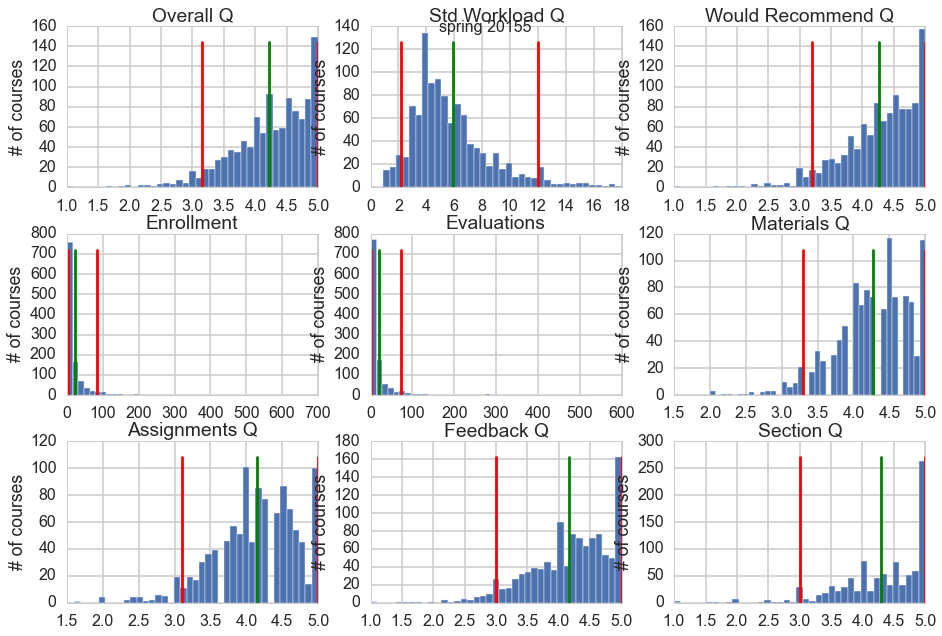

In [17]:
histogramColsOnDF(lastspringdf, alltitle='spring 20155')

F2006-S2015 [('Overall Q', 4.179605958166069), ('Std Workload Q', 6.062978858686905), ('Would Recommend Q', 4.2363660393318145), ('Enrollment', 24.69770266701875), ('Evaluations', 19.691418008978083), ('Materials Q', 4.200554518795007), ('Assignments Q', 4.093666098444514), ('Feedback Q', 4.077580146980539), ('Section Q', 4.2256540242834)]


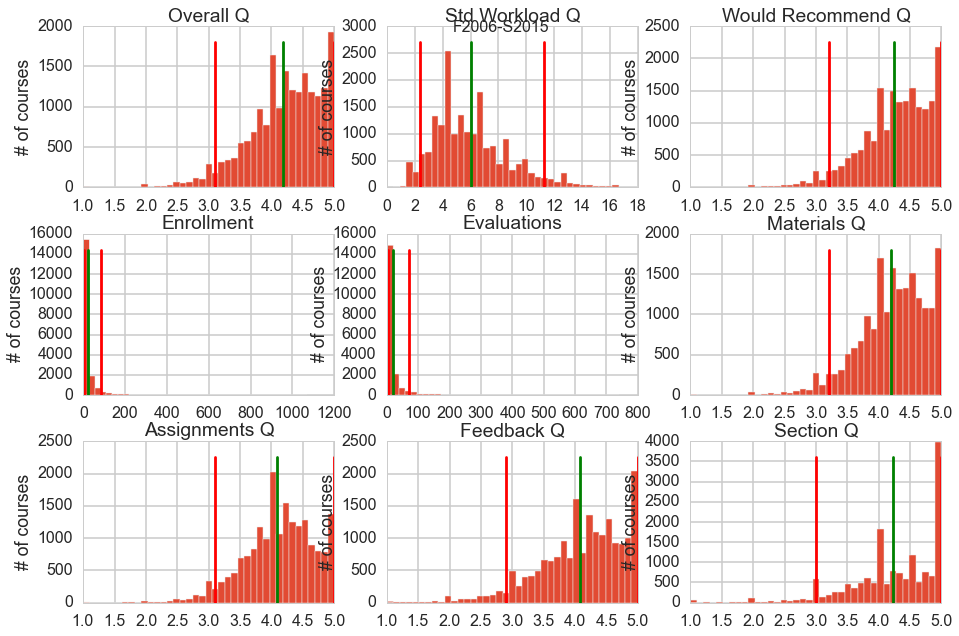

In [78]:
histogramColsOnDF(df, 'F2006-S2015')

[1011, 900, 880, 836, 663, 657, 476, 470, 466, 450, 420, 414, 399, 303, 299, 298, 292, 285, 268, 255, 247, 238, 235, 228, 225, 206, 200, 186, 184, 177, 176, 159, 157, 154, 149, 144, 144, 141, 140, 130, 127, 115, 112, 112, 108, 104, 102]


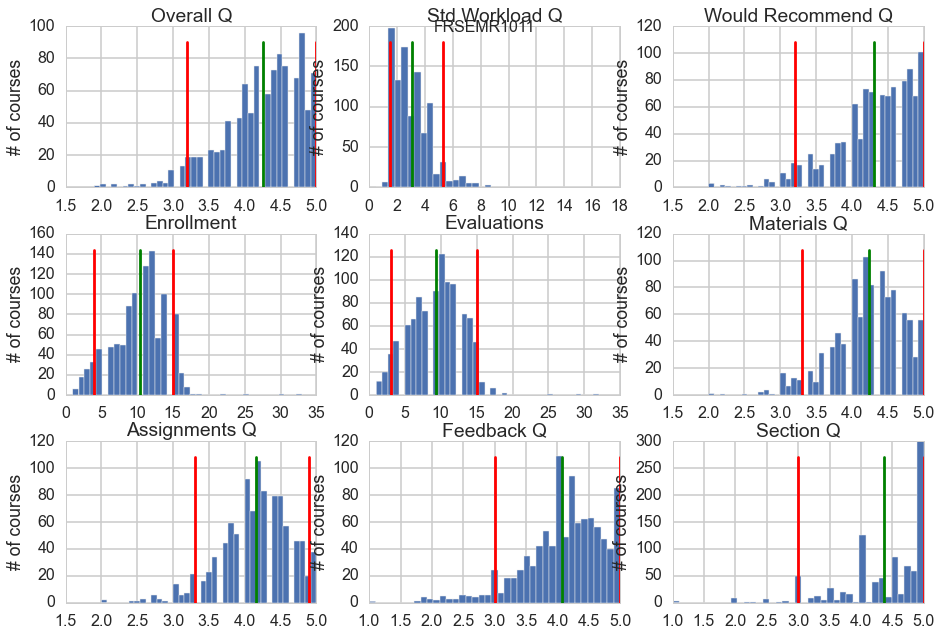

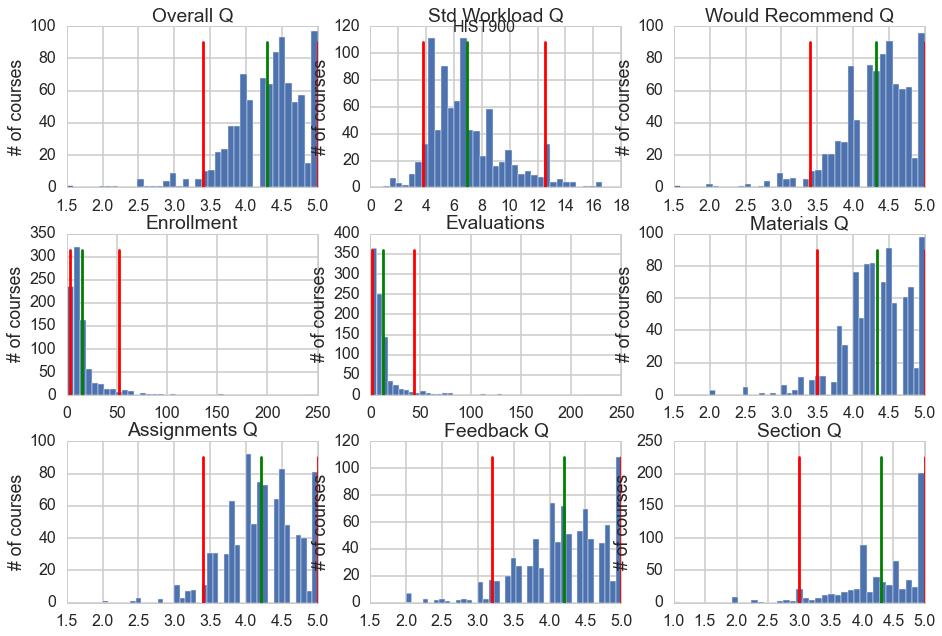

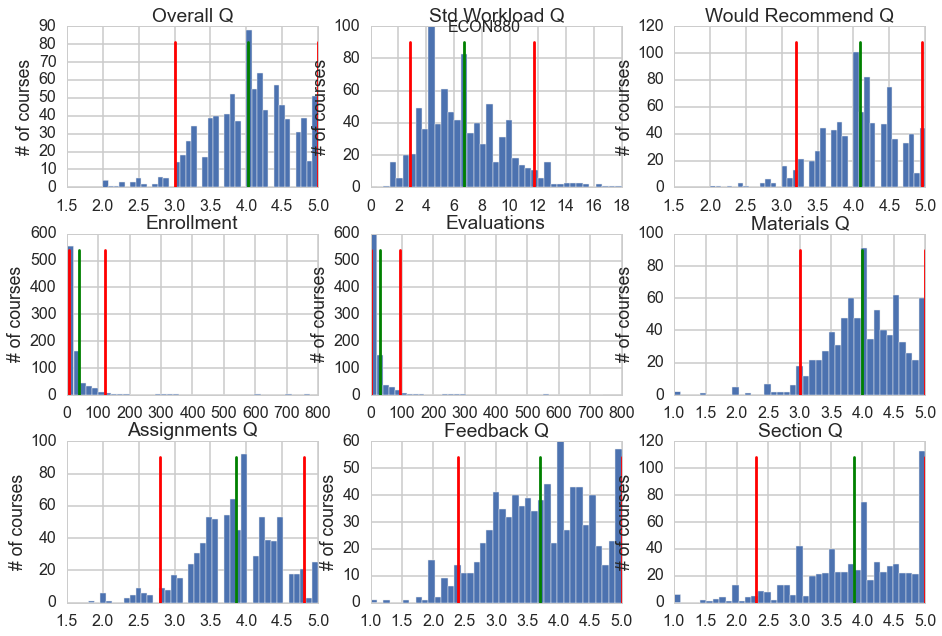

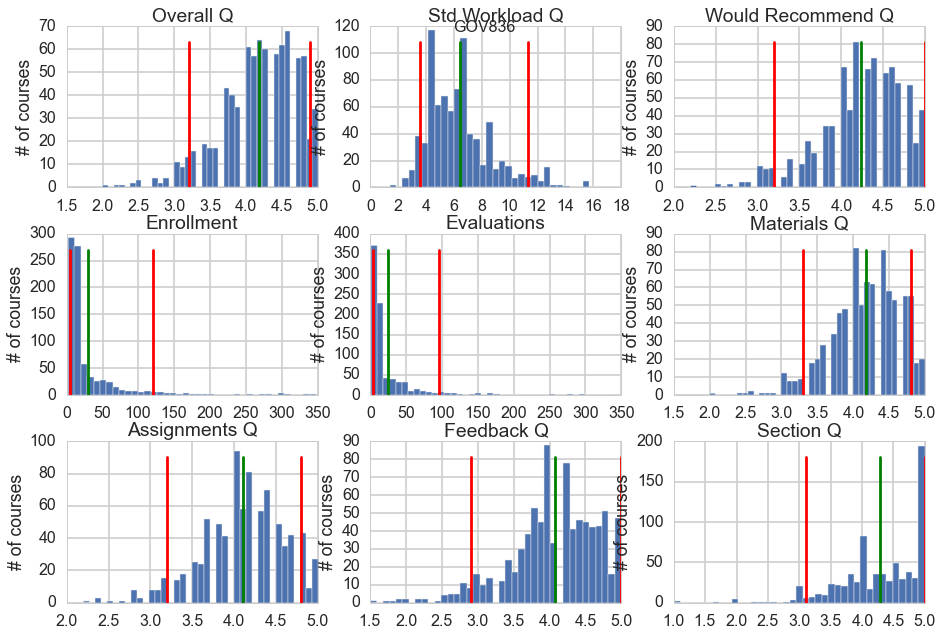

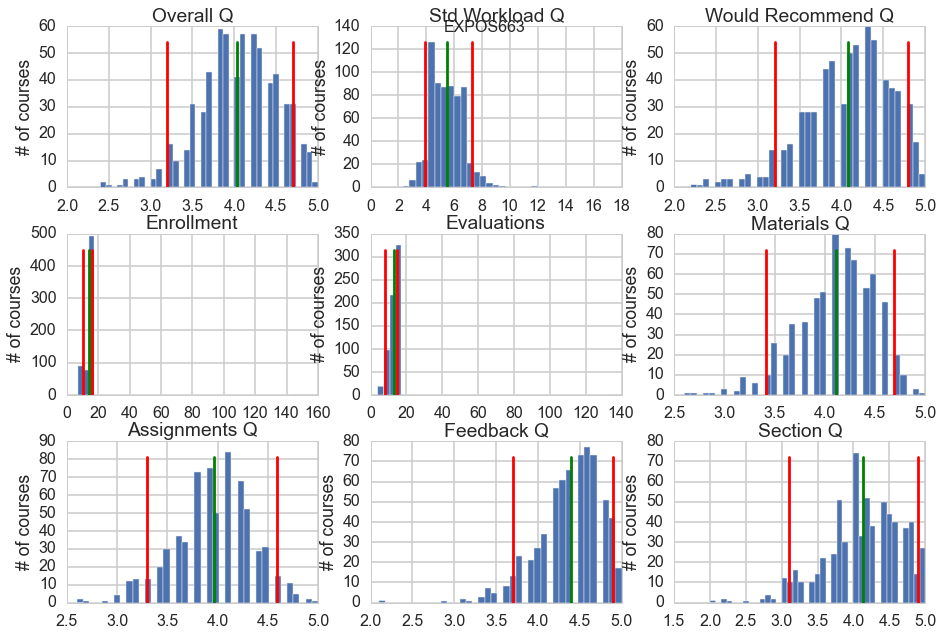

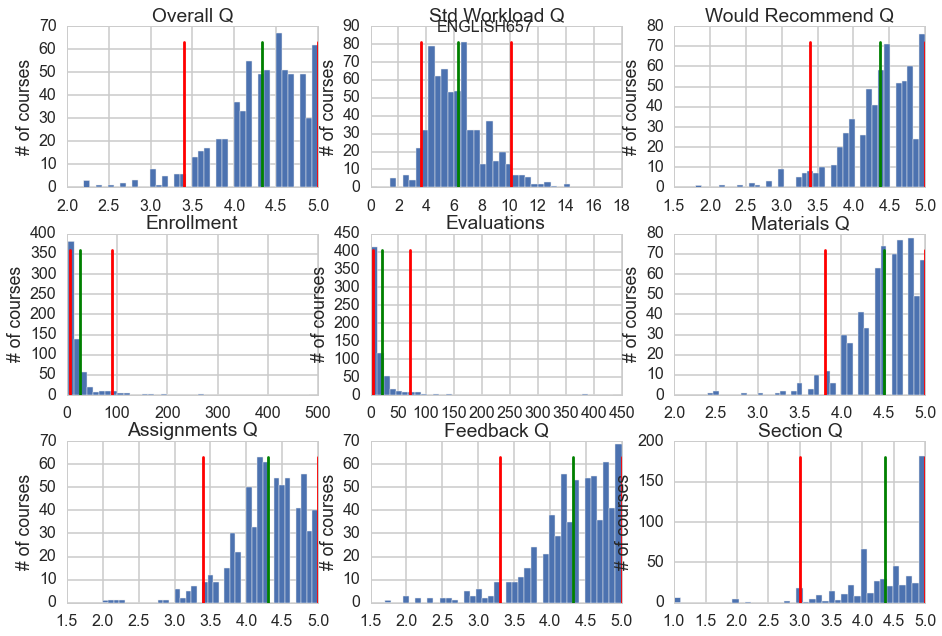

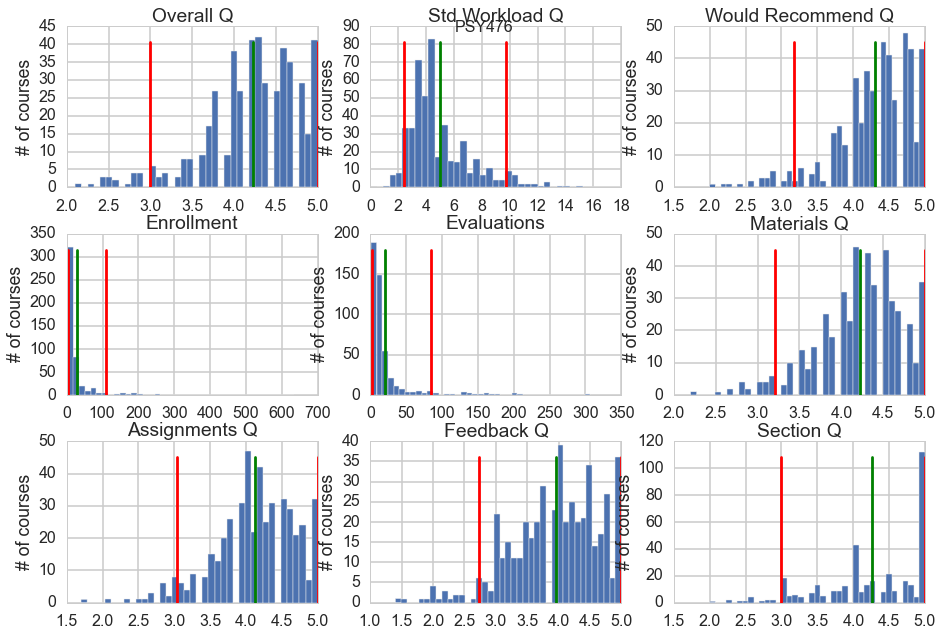

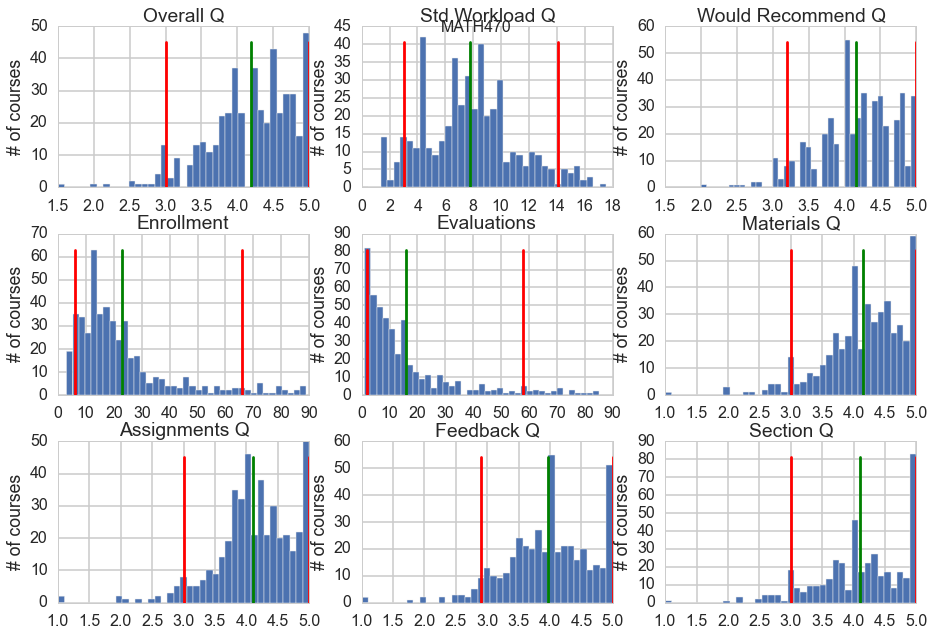

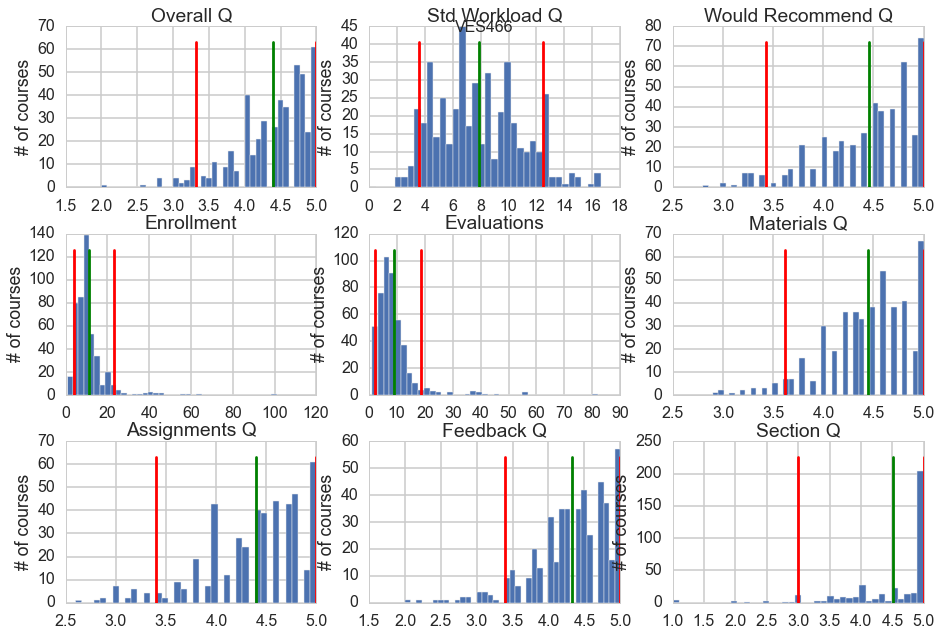

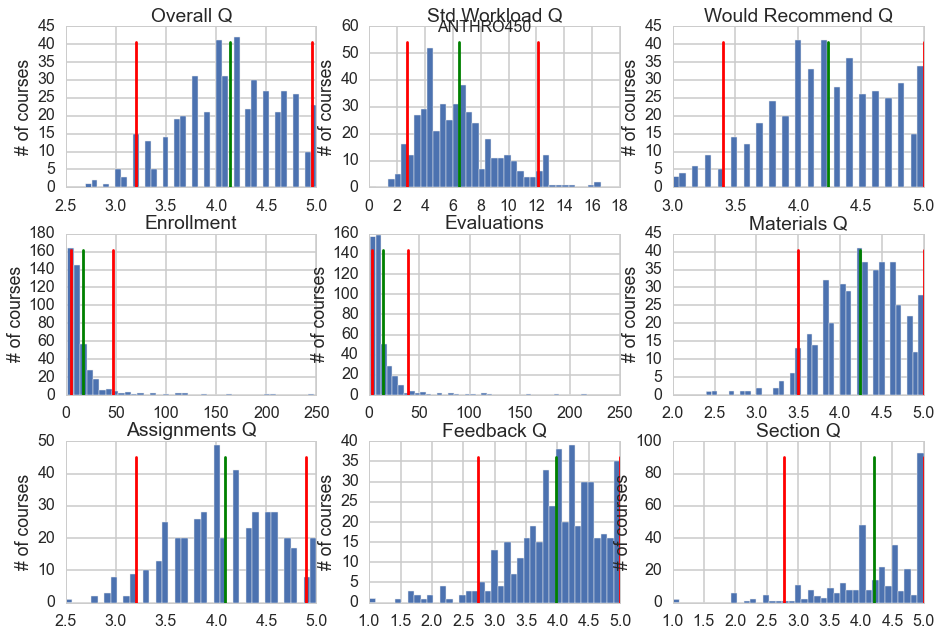

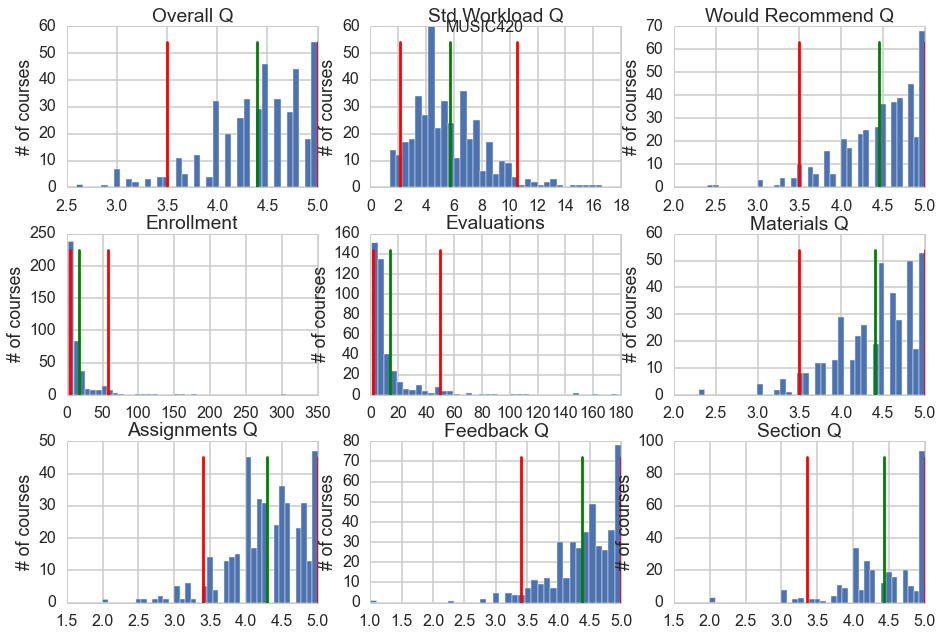

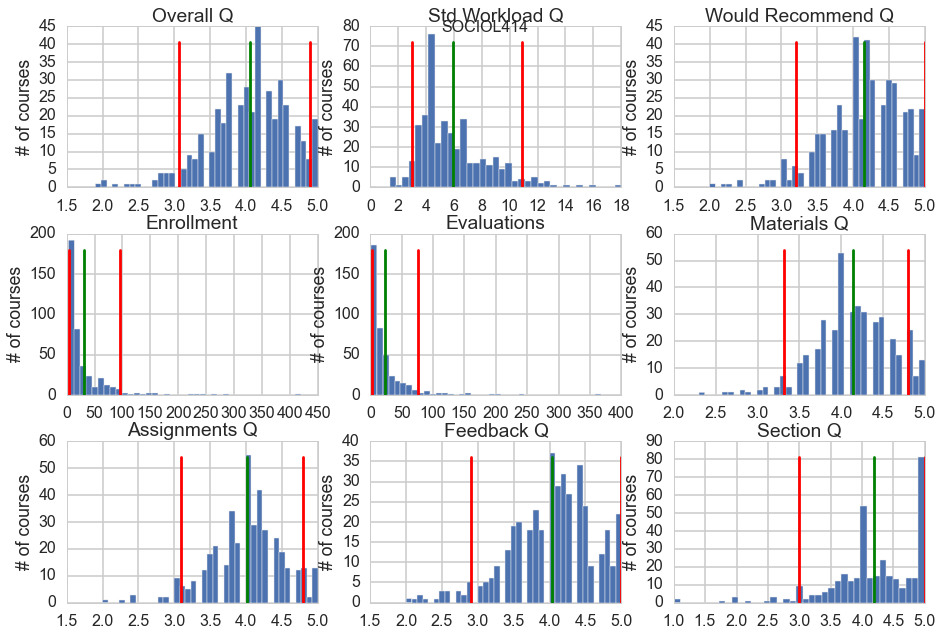

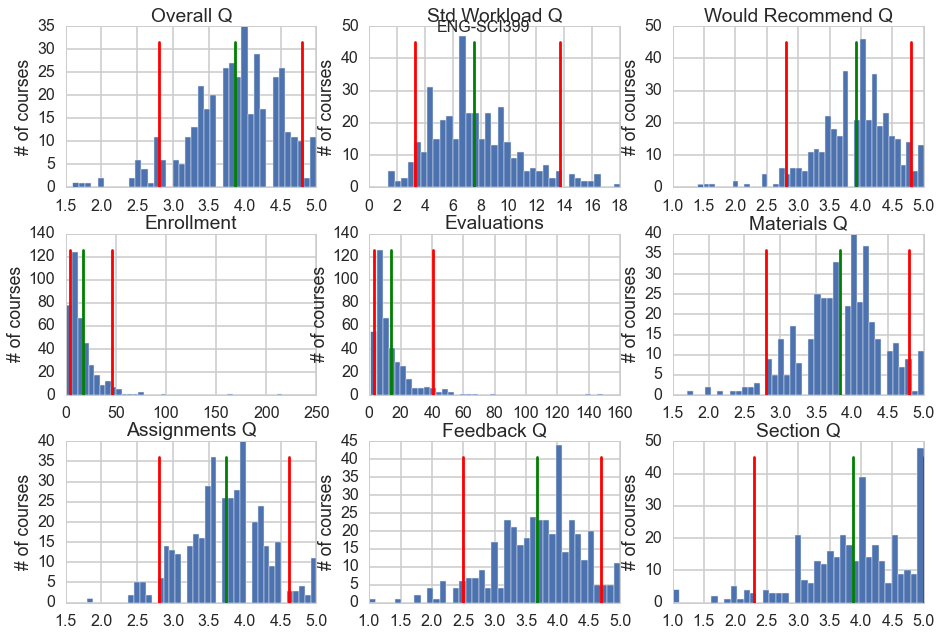

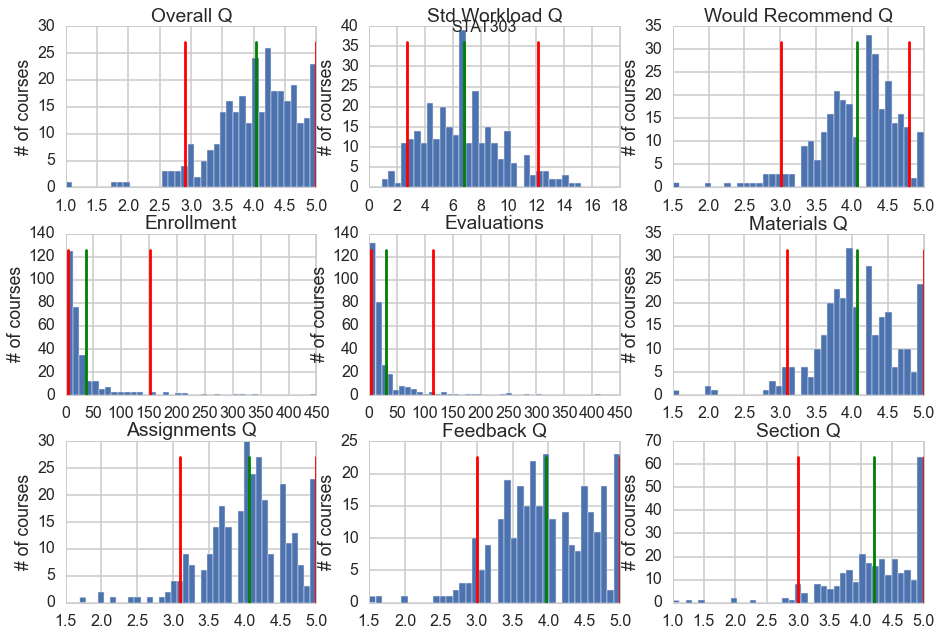

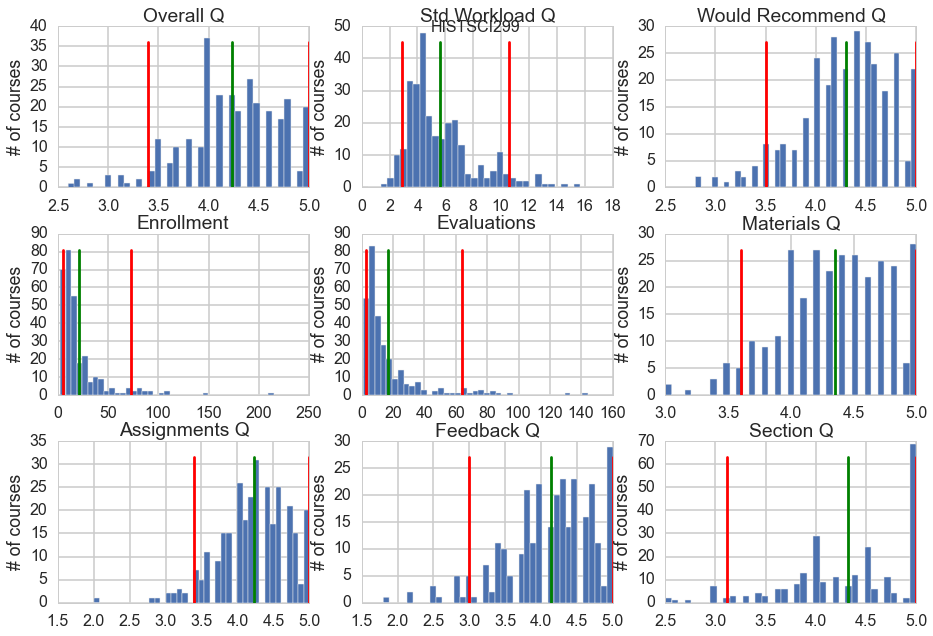

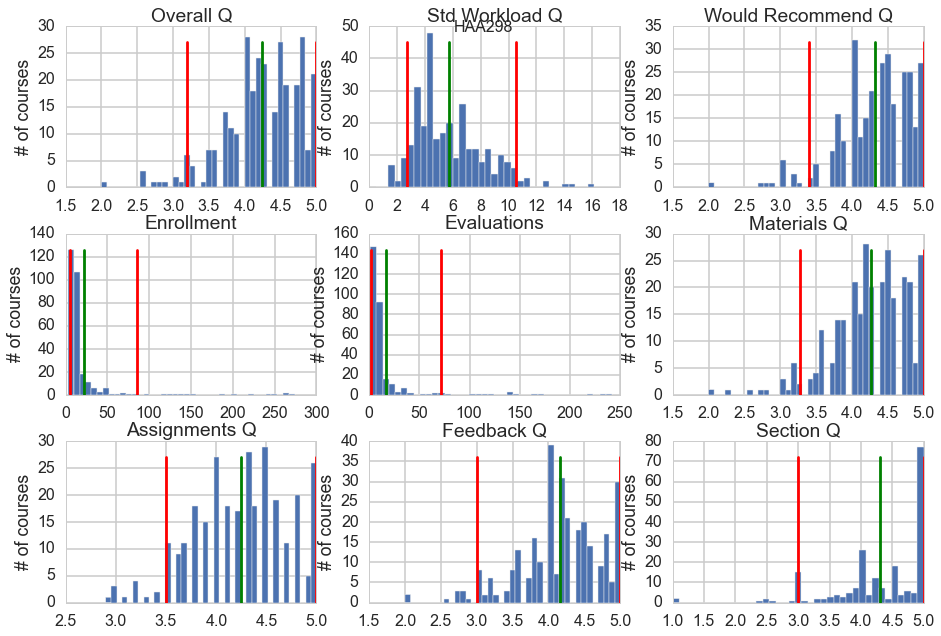

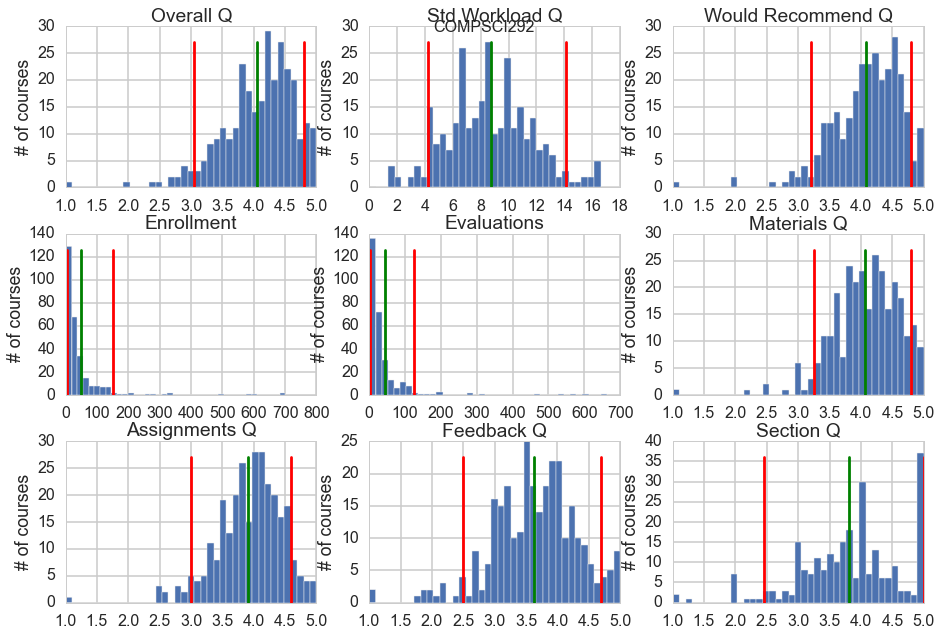

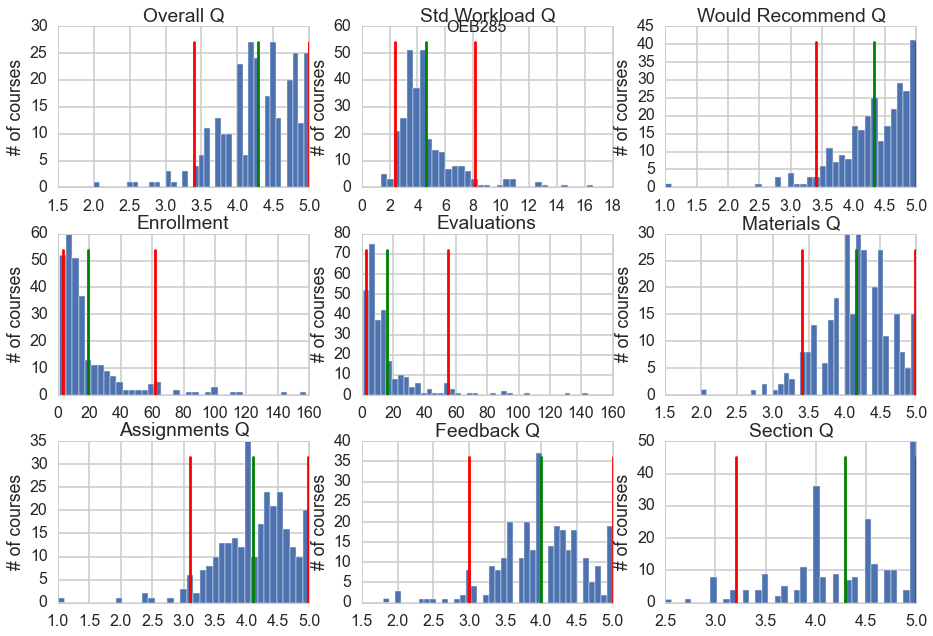

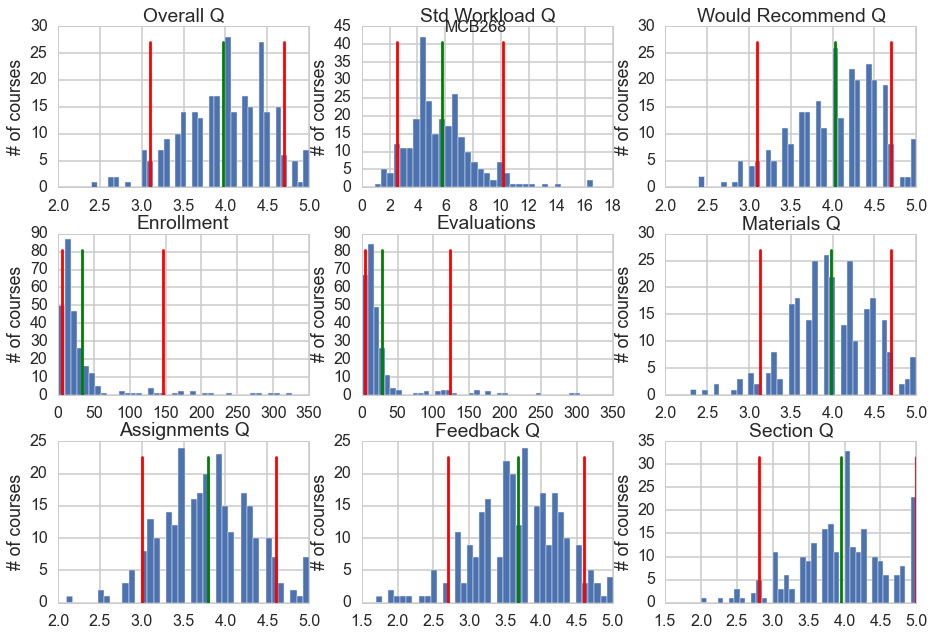

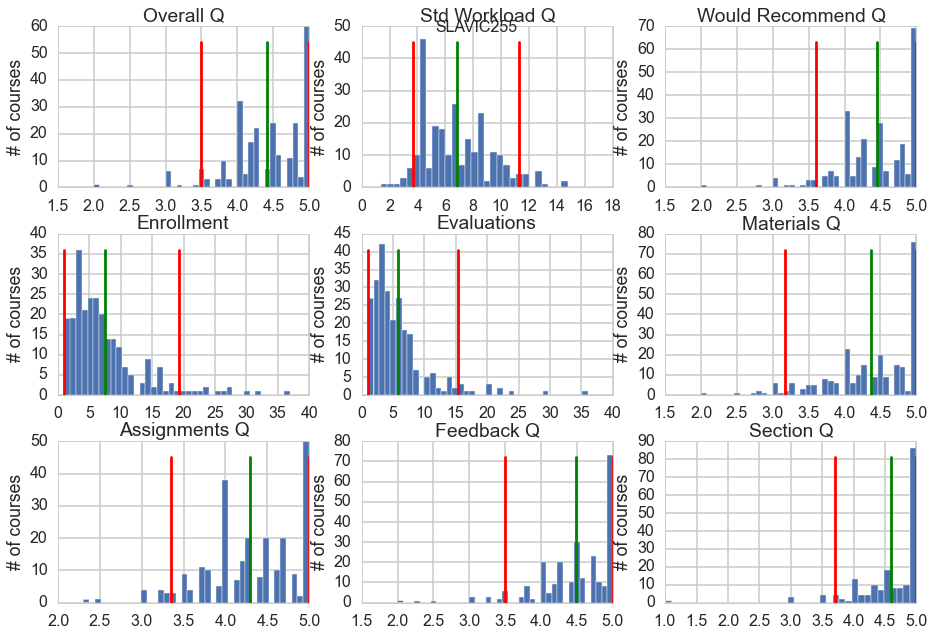

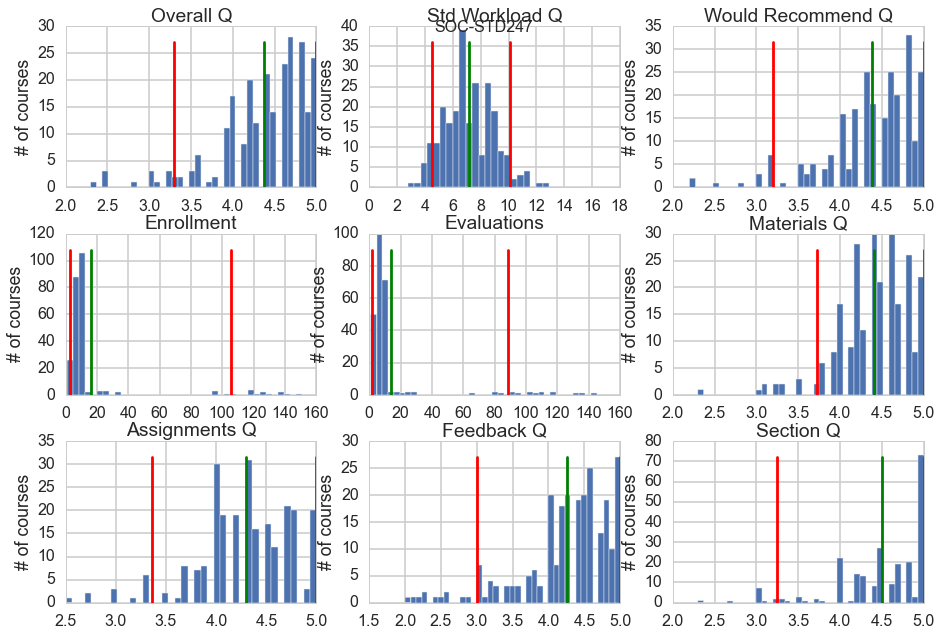

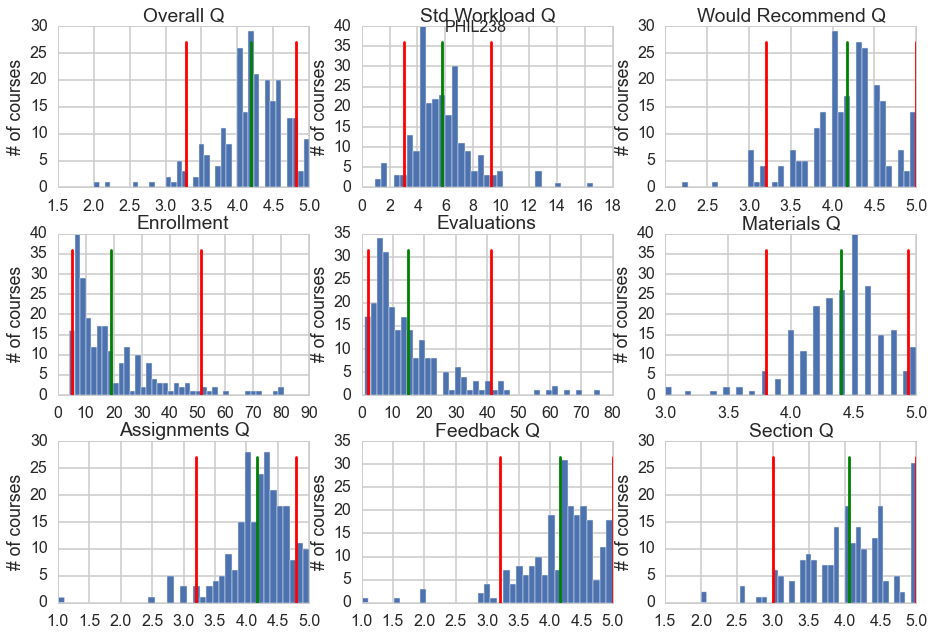

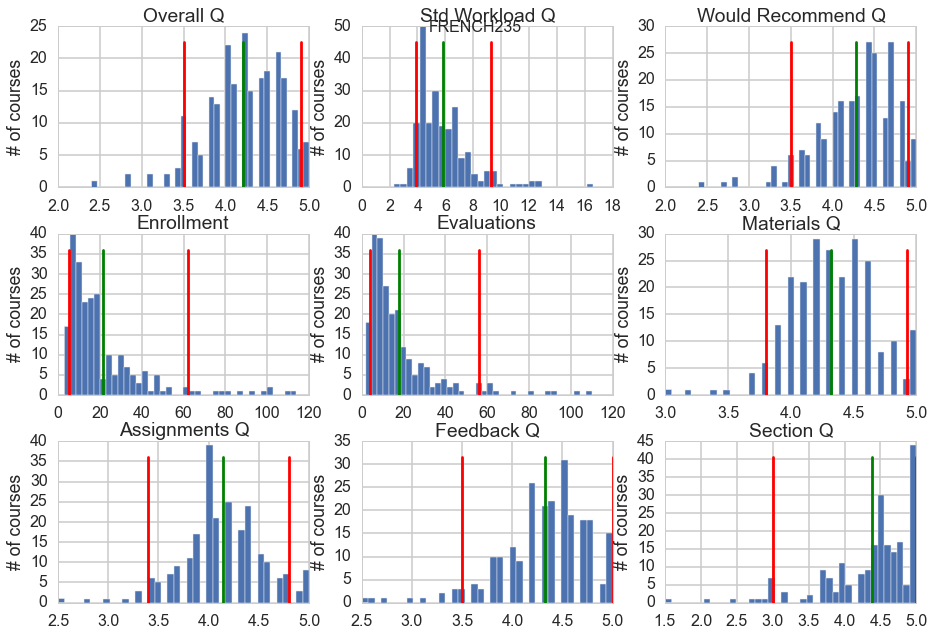

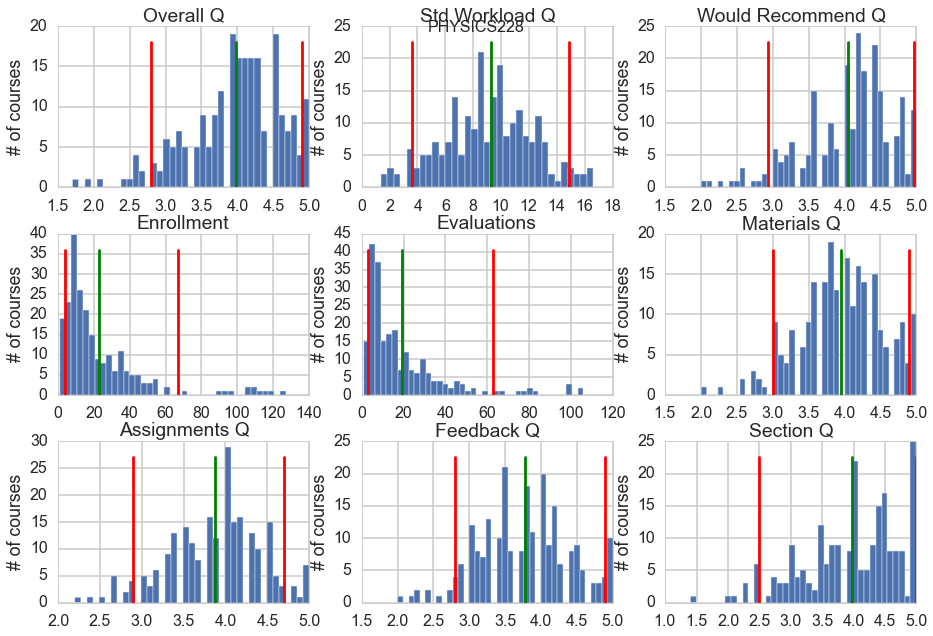

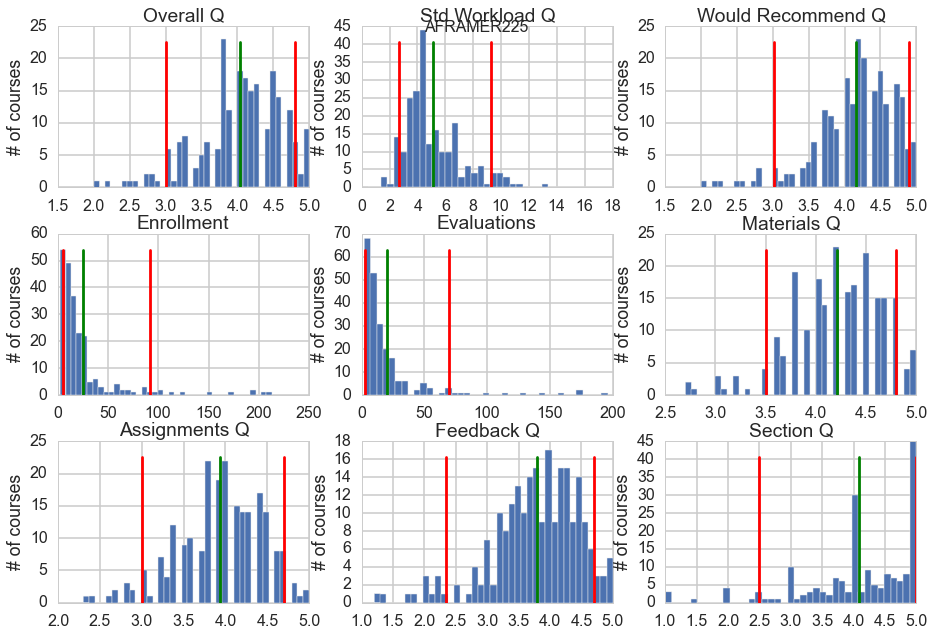

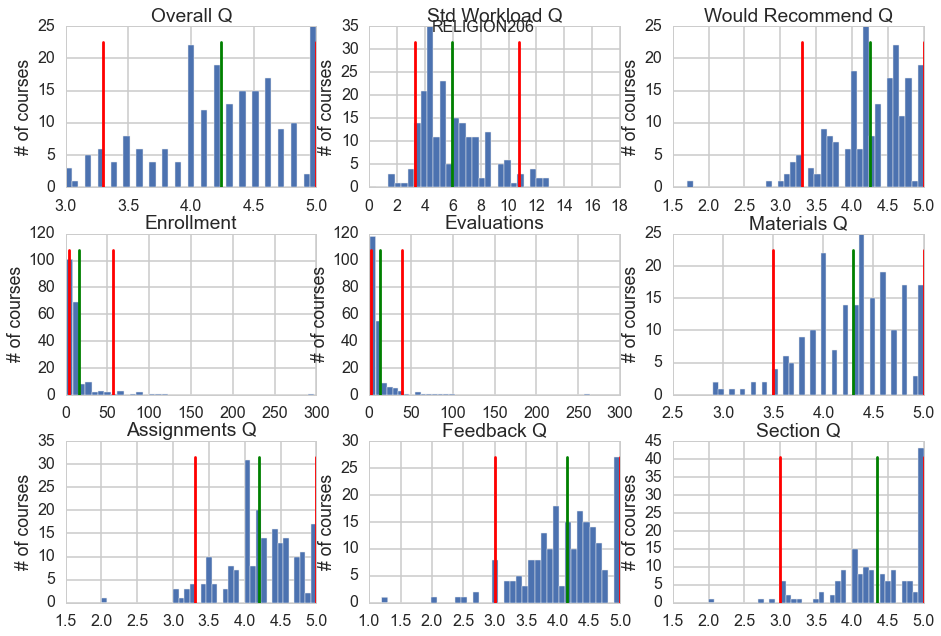

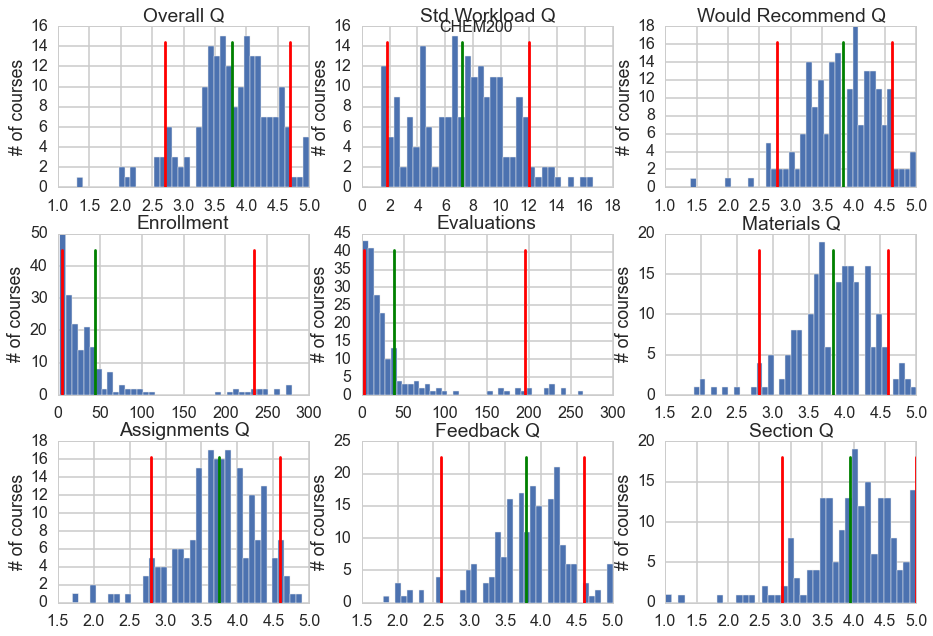

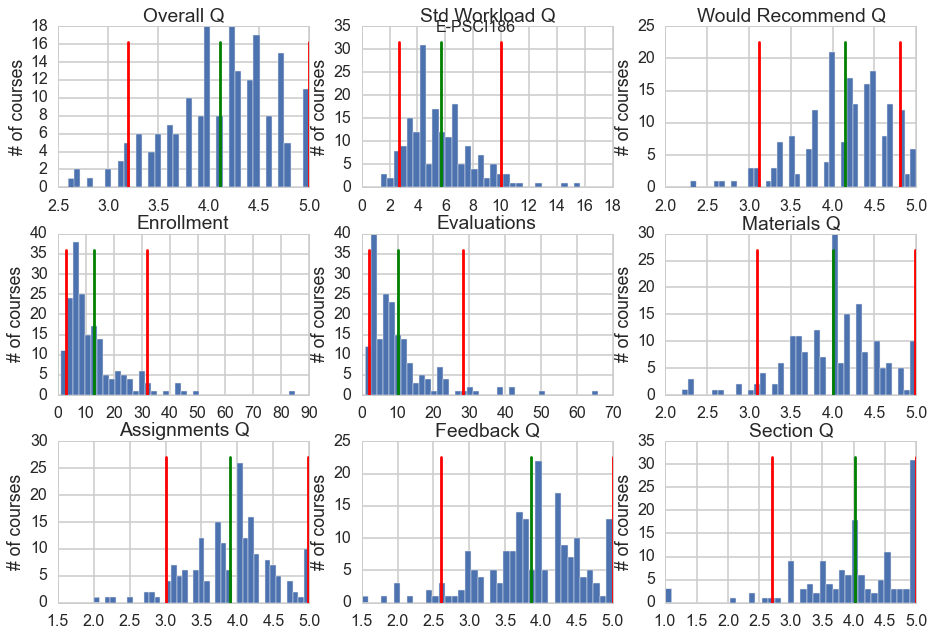

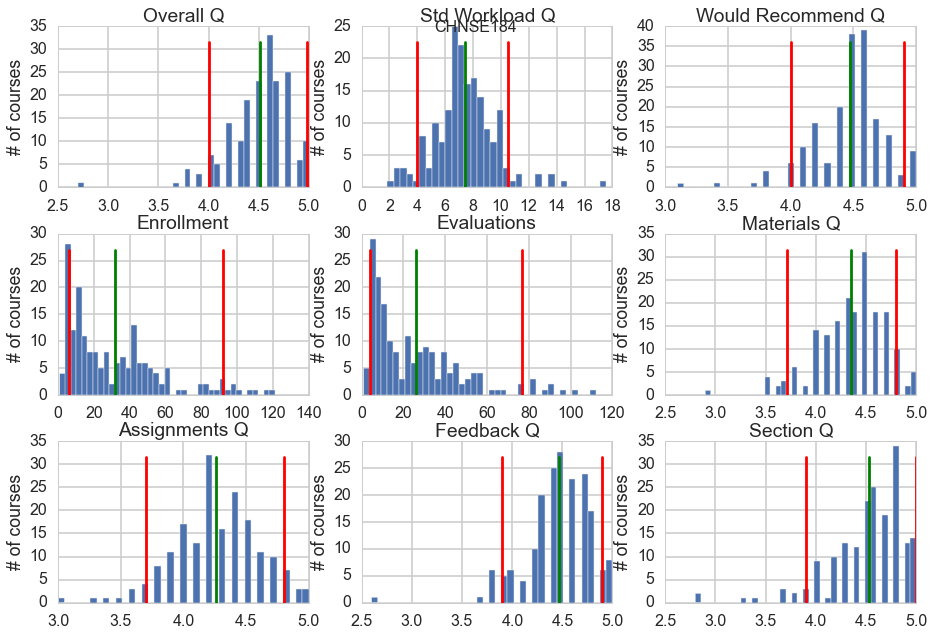

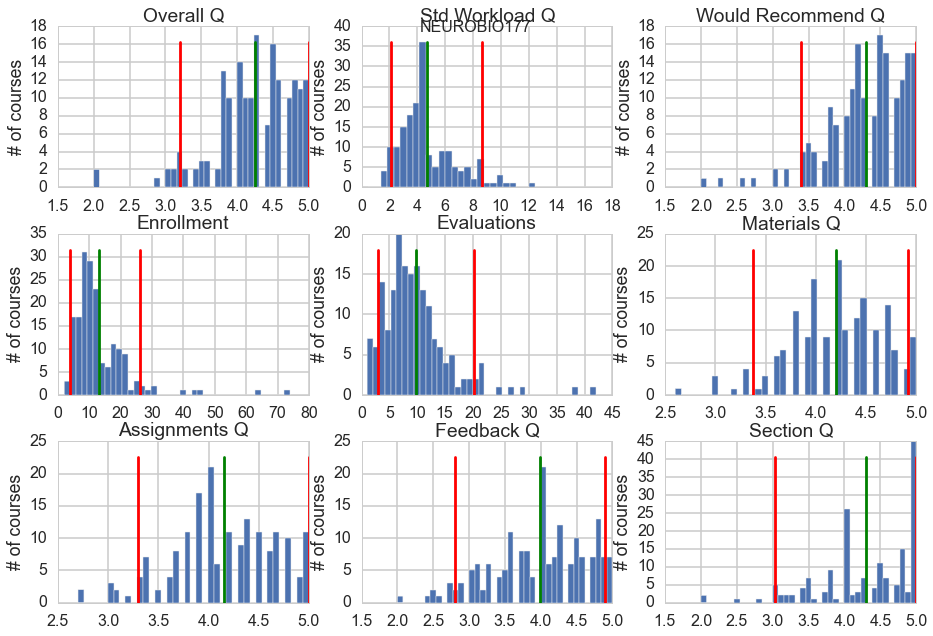

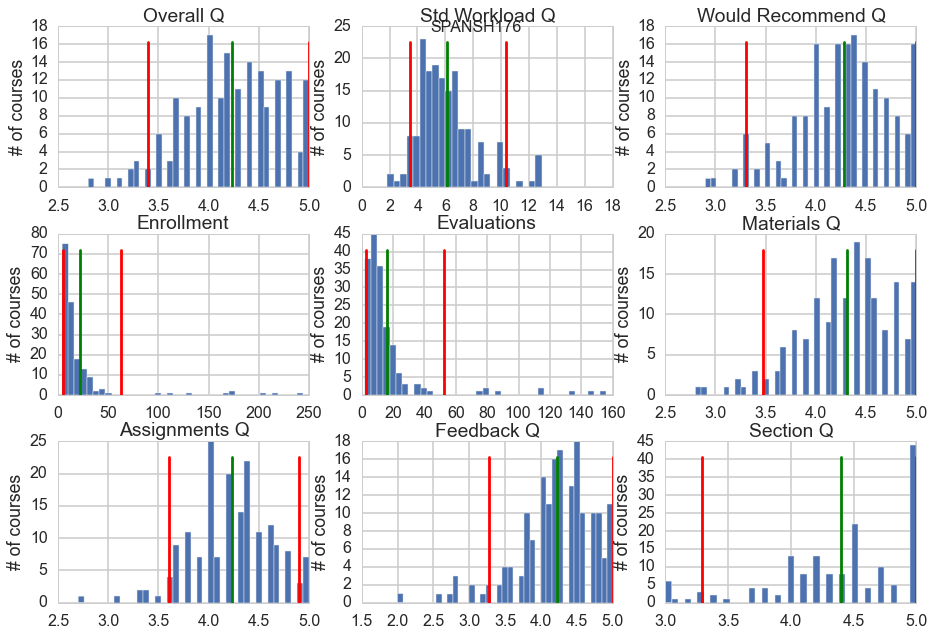

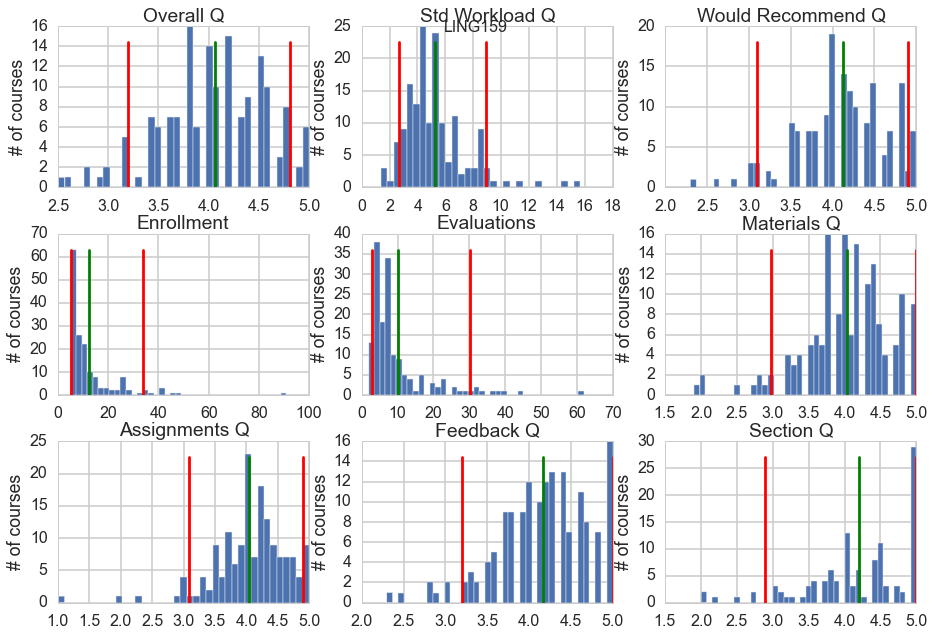

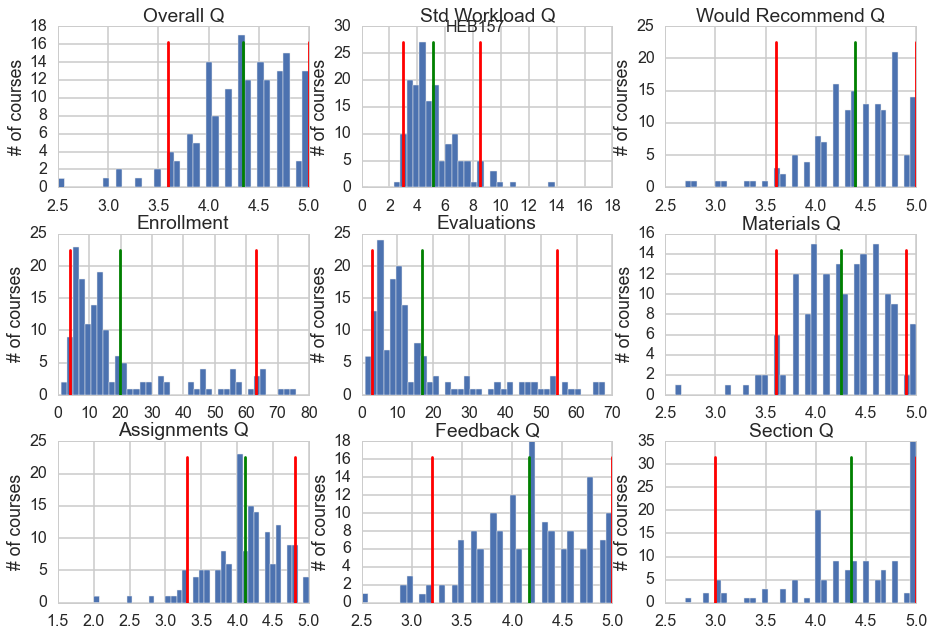

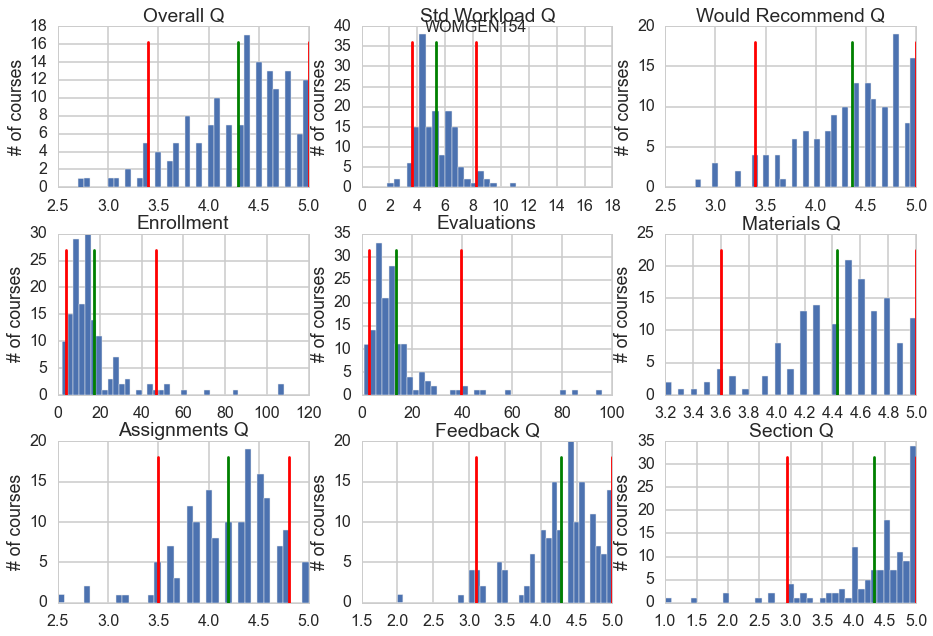

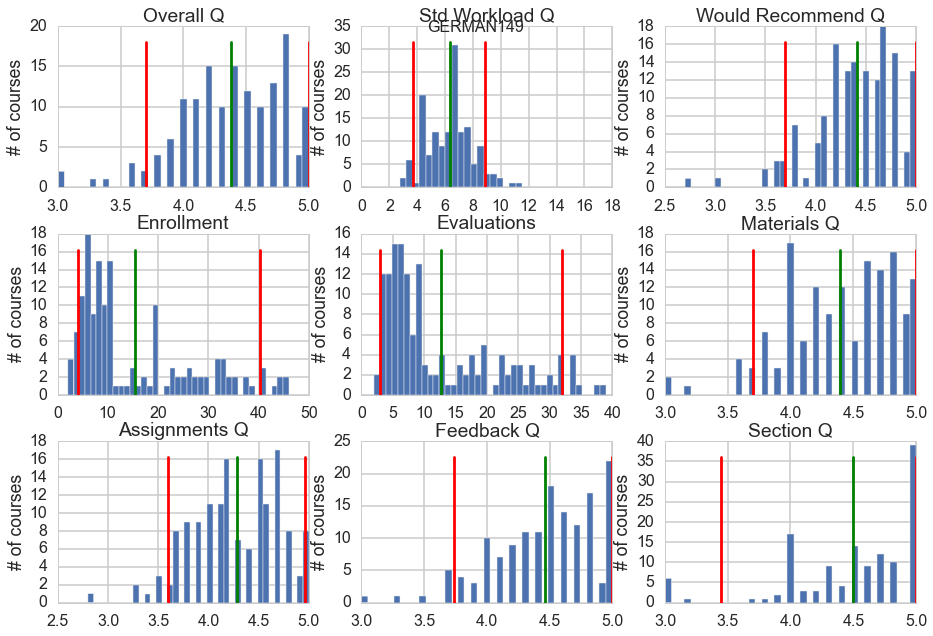

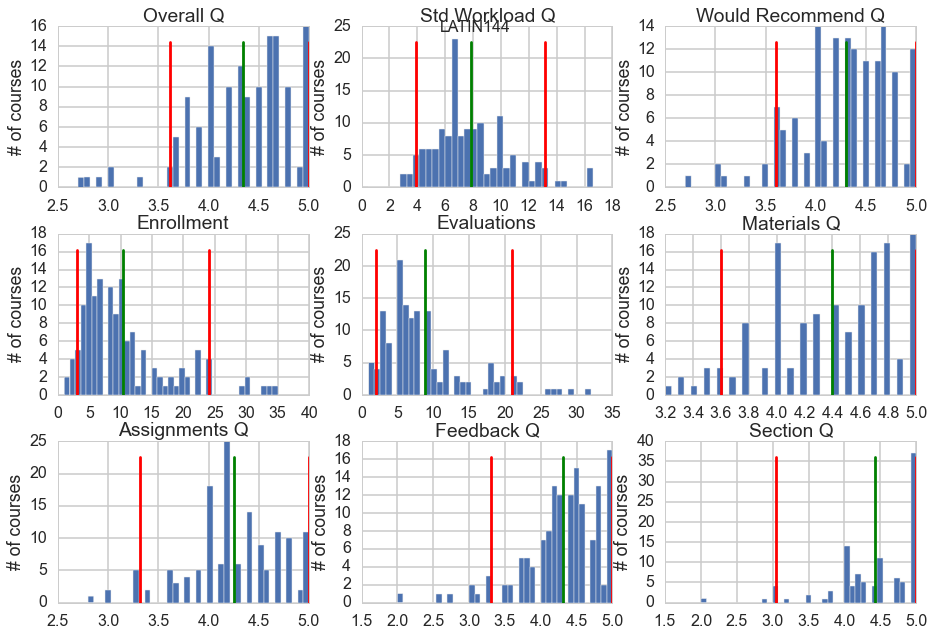

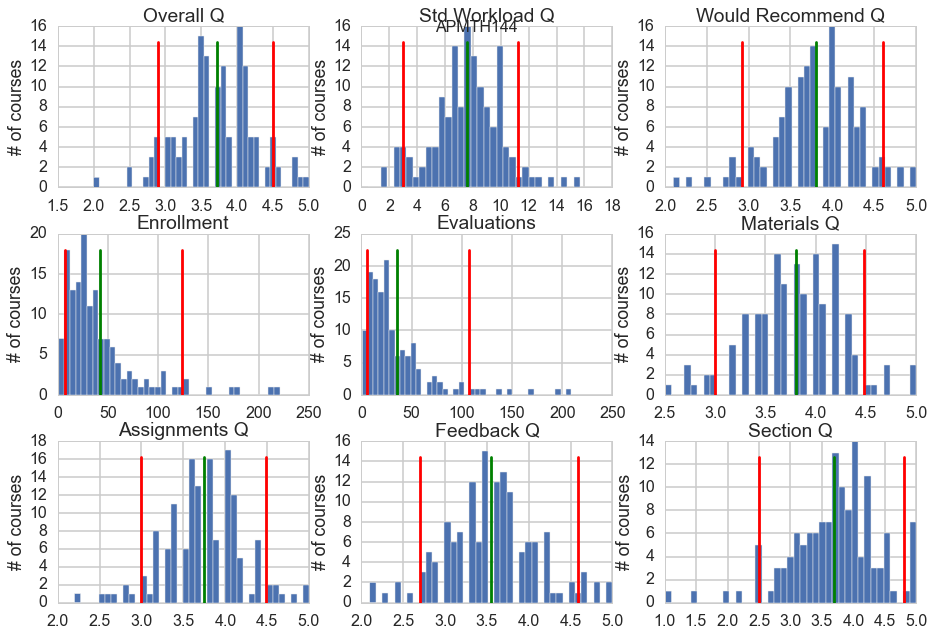

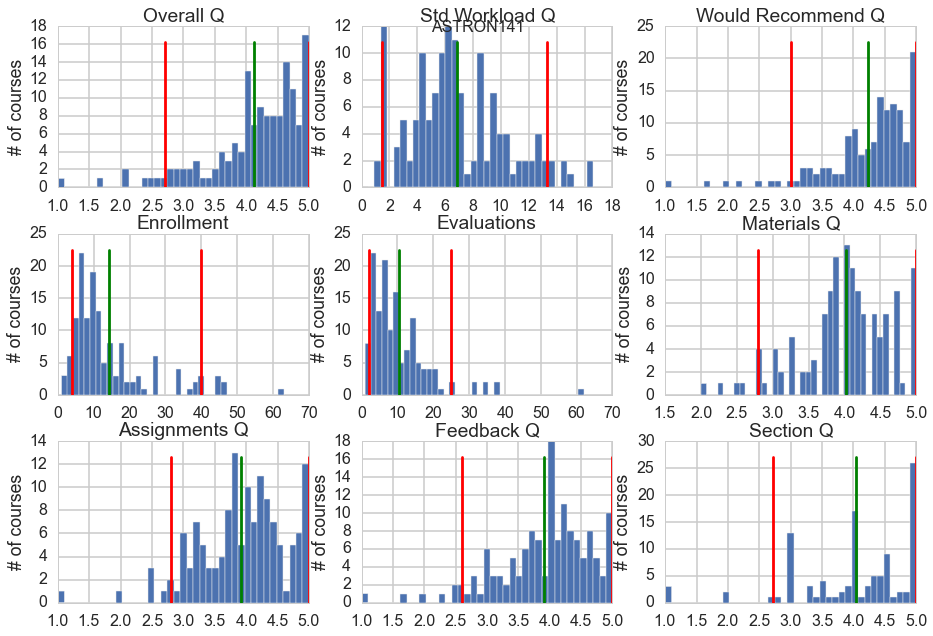

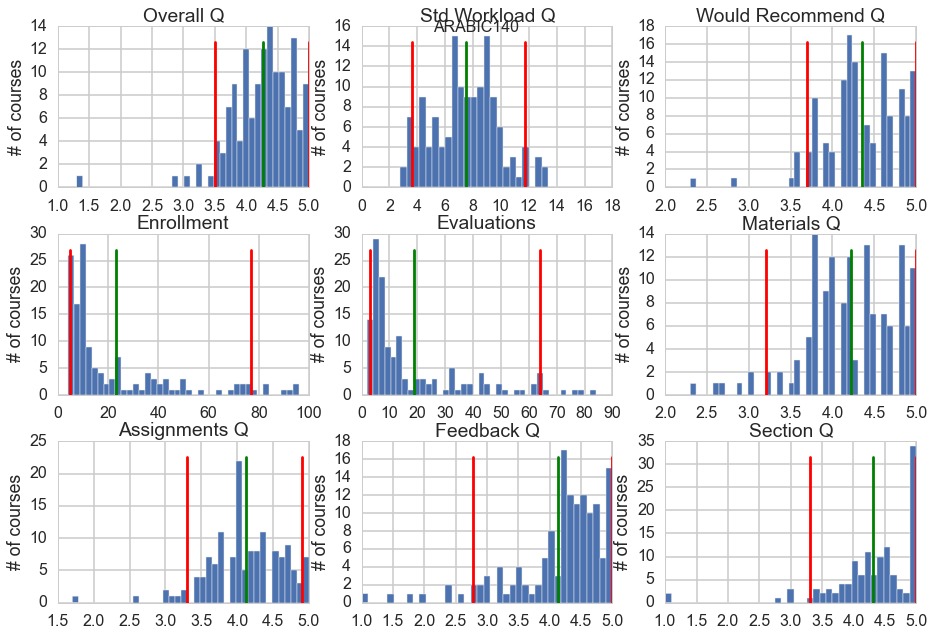

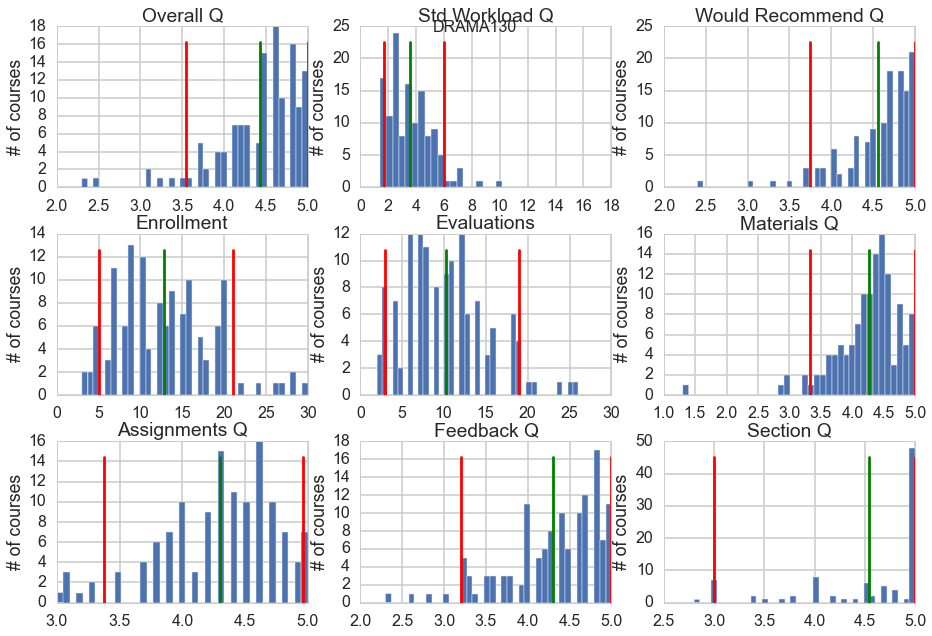

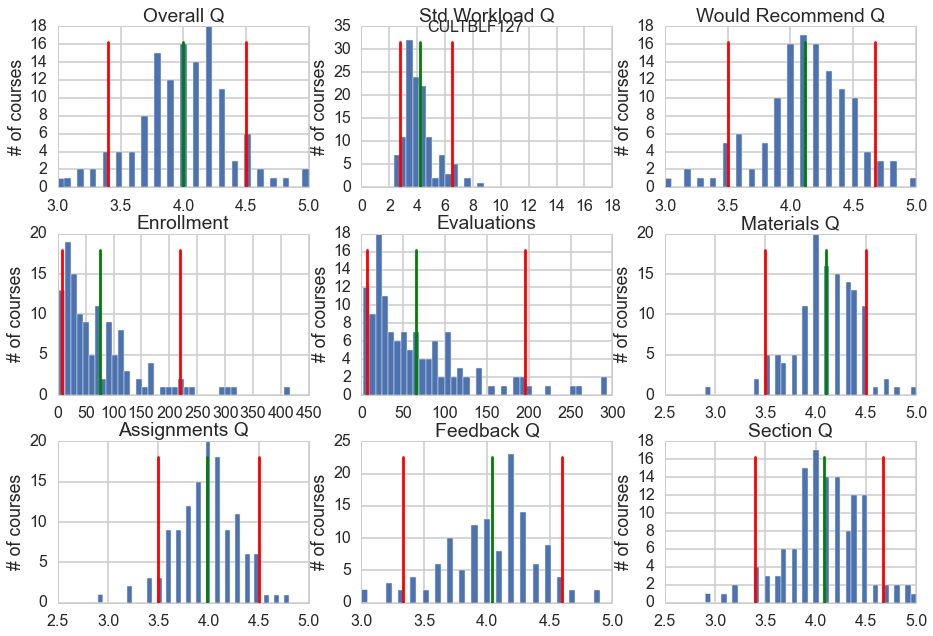

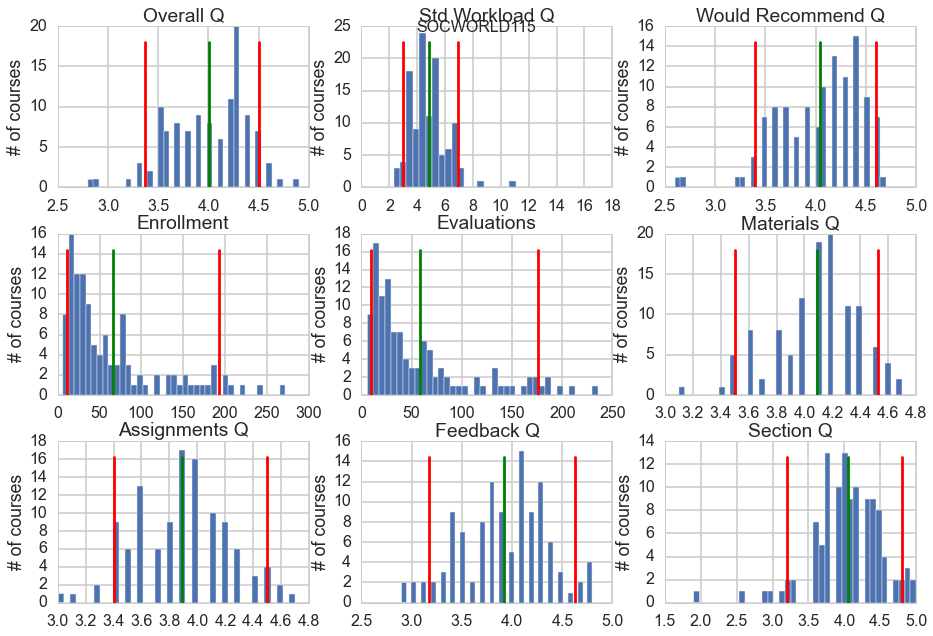

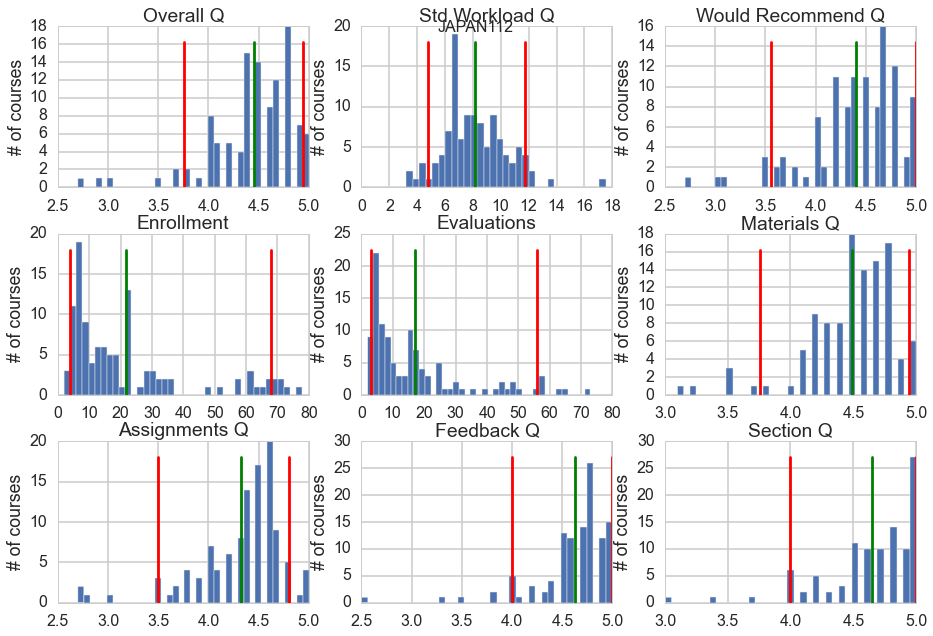

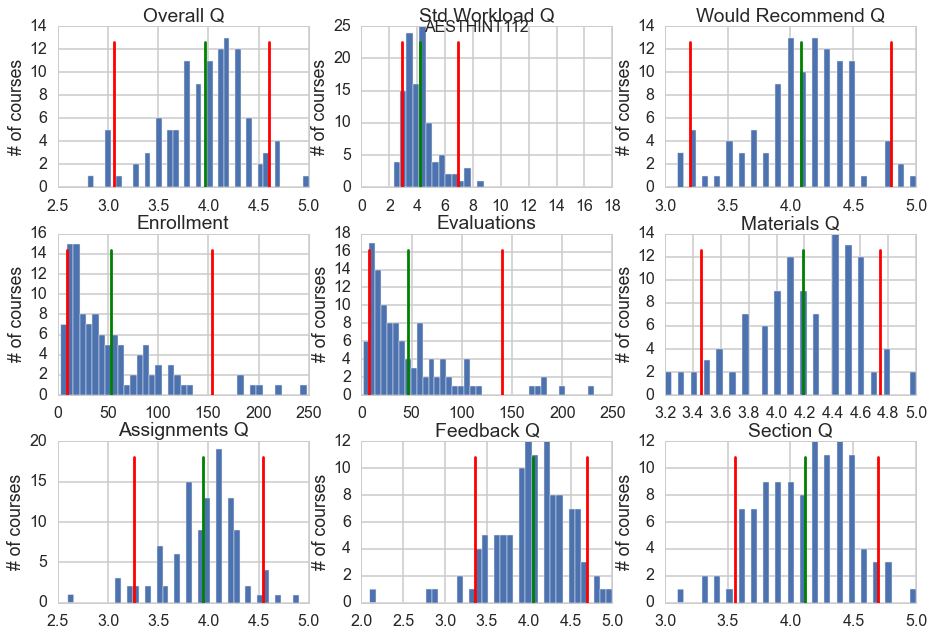

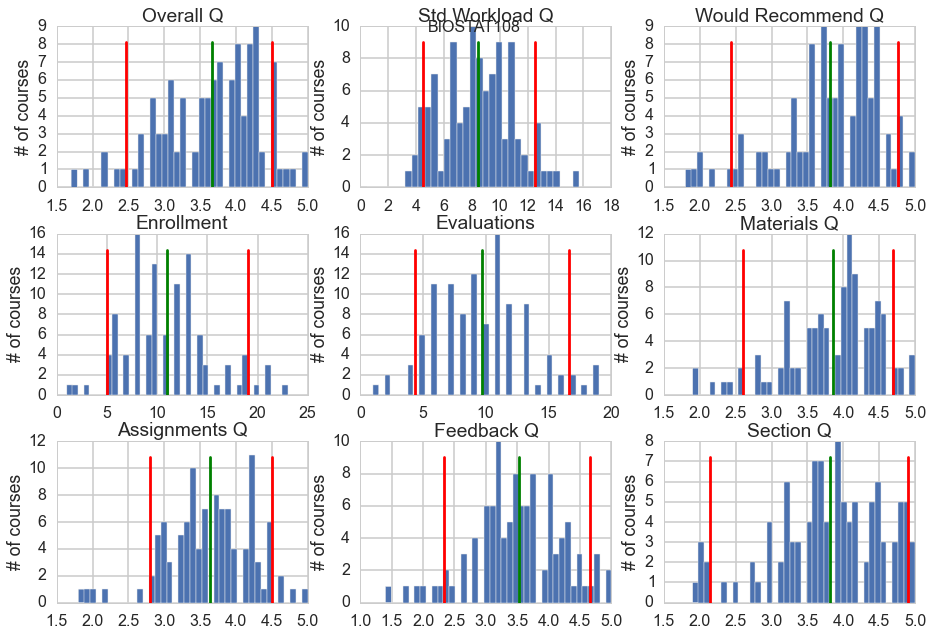

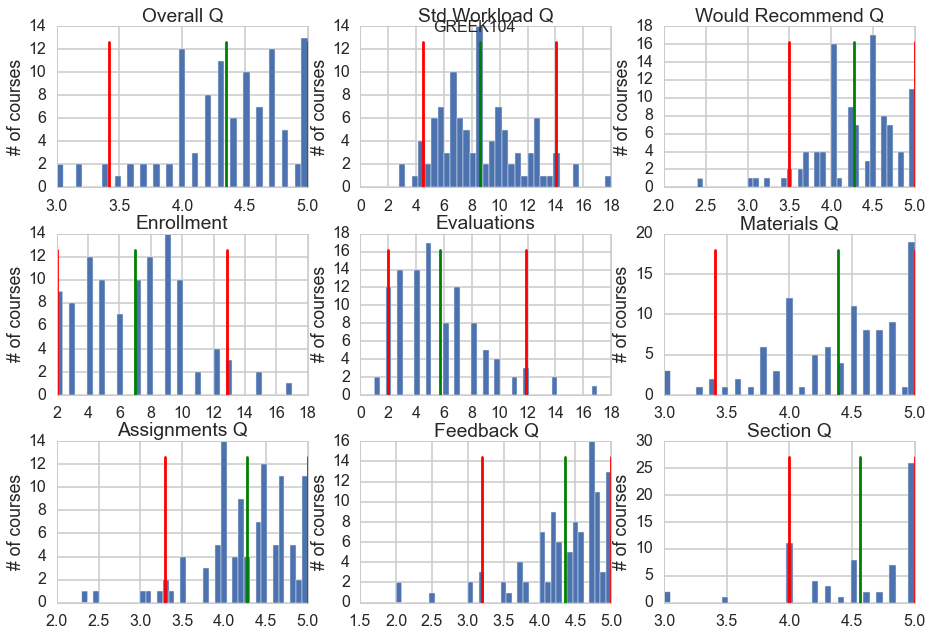

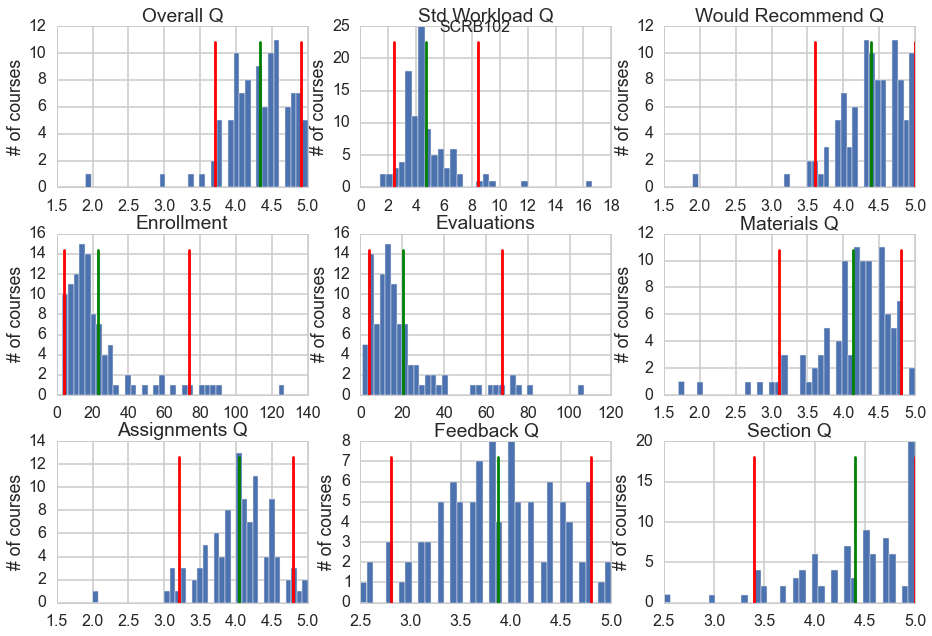

In [99]:
allcats = df['Course Category'].value_counts()
allcatsFloored = [v for v in allcats if v >= 100]
print allcatsFloored #len(allcatsFloored)
catsFloorWithInd = allcats[:47]
for cat in catsFloorWithInd.keys():
    minedf = df[df['Course Category'] == cat]
    thetitle = cat + str(len(minedf))
    histogramColsOnDF(minedf, alltitle=thetitle)

######Analyzing each of the largest categories

FRSEMR with 1011 classes tops the list. 3 hours less than average workload. expected
HIST 1 hours more workload than avg, avg rest
ECON -0.2 overall, 0.5 workload +, others -0.5
GOV avg, EXPOS mostly avg
PSY classes have approximately 1 hour mean less workload than average.
VES and MATH classes are 0.3 overall higher, 0.5 for most others, but 1.8 hours more workload.
MUSIC, ANTHRO classes have slightly higher workload and overall, and +0.5 for most others.
SOCIOL is basically average.
ENG-SCI: classes suck. 0.4 worse overall, 1.5 more hours workload, -0.4 in most others.
STAT: 0.2 worse overall, 0.5 hours more workload, -0.1 for most others
HAA, HISTSCI: 0.5 hours less workload, average rest
COMPSCI: 3 hours more workload, 0.5- feedback and section, avg rest
OEB: 1.5 hours less workload, average rest


In [56]:
enrol = bothdf.sort('Enrollment', ascending=False)
xxx = enrol.drop(enrol.columns[range(9,22)], axis=1)
xxx = xxx.drop(xxx.columns[range(4,8)], axis=1)
xxx = xxx.drop(xxx.columns[0], axis=1)
xxx = xxx.reset_index()
xxx = xxx.drop(xxx.columns[range(0,2)], axis=1)
xxx.head(20)

Course Number                                       Course Title  Enrollment  Year    Term
0       ECON 10A                            Principles of Economics         711  2014    Fall
1     COMPSCI 50                 Introduction to Computer Science I         696  2014    Fall
2     ETHRSON 18     Classical Chinese Ethical and Political Theory         694  2014    Fall
3       ECON 10B                            Principles of Economics         604  2015  Spring
4     LIFESCI 1A  An Integrated Introduction to the Life Science...         485  2014    Fall
5     LIFESCI 1B  An Integrated Introduction to the Life Science...         446  2015  Spring
6     ECON 1010B                               Macroeconomic Theory         344  2015  Spring
7       PHYSCI 1  Chemical Bonding, Energy, and Reactivity: An I...         326  2015  Spring
8       STAT 110                        Introduction to Probability         320  2014    Fall
9     CULTBLF 34  Madness and Medicine: Themes in the History of...         315  2014    Fall
10    COMPSCI 51                Introduction to Computer Science II         312  2015  Spring
11        GOV 20                Foundations of Comparative Politics         300  2014    Fall
12    CULTBLF 23  From the Hebrew Bible to Judaism, From the Old...         293  2015  Spring
13       CHEM 17                    Principles of Organic Chemistry         280  2014    Fall
14   SOCWORLD 24  Global Health Challenges: Complexities of Evid...         272  2015  Spring
15        PSY 15                                  Social Psychology         258  2015  Spring
16       CHEM 27                          Organic Chemistry of Life         246  2015  Spring
17    CULTBLF 39                                   The Hebrew Bible         242  2014    Fall
18     EMREAS 20                The Business and Politics of Health         234  2014    Fall
19   COMPSCI 181                                   Machine Learning         207  2015  Spring

In [55]:
#pd.set_option('display.max_rows', 150)
enrol = df.sort('Enrollment', ascending=False)
xxx = enrol.drop(enrol.columns[range(9,22)], axis=1)
xxx = xxx.drop(xxx.columns[range(4,8)], axis=1)
xxx = xxx.drop(xxx.columns[0], axis=1)
xxx = xxx.reset_index()
xxx = xxx.drop(xxx.columns[range(0,2)], axis=1)
xxx.head(20)

Course Number                                    Course Title  Enrollment  Year    Term
0    MOR-REAS 22                                         Justice        1072  2007    Fall
1    SOC-ANAL 10                         Principles of Economics         947  2006    Fall
2    MOR-REAS 22                                         Justice         872  2008    Fall
3    SOC-ANAL 10                         Principles of Economics         812  2007    Fall
4     ETHRSON 22                                         Justice         797  2010    Fall
5        ECON 10                         Principles of Economics         776  2010    Fall
6    SOC-ANAL 10                         Principles of Economics         765  2008    Fall
7       ECON 10A                         Principles of Economics         762  2013    Fall
8     ETHRSON 18  Classical Chinese Ethical and Political Theory         723  2013    Fall
9        ECON 10                         Principles of Economics         722  2011    Fall
10       ECON 10                         Principles of Economics         711  2012    Fall
11   SOC-ANAL 10                         Principles of Economics         711  2007  Spring
12      ECON 10A                         Principles of Economics         711  2014    Fall
13    COMPSCI 50              Introduction to Computer Science I         701  2012    Fall
14    COMPSCI 50              Introduction to Computer Science I         696  2014    Fall
15    ETHRSON 18  Classical Chinese Ethical and Political Theory         694  2014    Fall
16       ECON 10                         Principles of Economics         689  2011  Spring
17   SOC-ANAL 10                         Principles of Economics         683  2009    Fall
18      ECON 10B                         Principles of Economics         657  2014  Spring
19      PSY 1504                             Positive Psychology         634  2008  Spring

In [57]:
xxx = df.sort('Workload Q', ascending=False)
usilly = xxx[xxx['Enrollment'] > 15]

xxx = xxx.drop(xxx.columns[range(7,24)], axis=1)
xxx = xxx.drop(xxx.columns[range(4,6)], axis=1)
xxx = xxx.drop(xxx.columns[0], axis=1)
xxx = xxx.reset_index()
xxx = xxx.drop(xxx.columns[range(0,2)], axis=1)
display(xxx.head(10))

axxx = usilly.drop(usilly.columns[range(7,24)], axis=1)
axxx = axxx.drop(axxx.columns[range(4,6)], axis=1)
axxx = axxx.drop(axxx.columns[0], axis=1)
axxx = axxx.reset_index()
axxx = axxx.drop(axxx.columns[range(0,2)], axis=1)
display(axxx.head(10))



Course Number                                   Course Title  Std Workload Q
0    COMPSCI 161                              Operating Systems            30.3
1      HIST 2272                      The Soviet Union: Seminar            26.7
2   PHYSICS 253B                        Quantum Field Theory II            25.4
3        MCB 293  Biochemistry, Chemical and Structural Biology            23.7
4      APPHY 282                  Solids: Structure and Defects            22.8
5   PHYSICS 287A                  Introduction to String Theory            22.0
6  PHYSICS 287BR                        Topics in String Theory            22.0
7       MATH 55B               Honors Real and Complex Analysis            20.6
8       SHBT 205          Neural Coding and Perception of Sound            20.1
9      APPHY 275              Computational Design of Materials            20.0

Course Number                                   Course Title  Std Workload Q
0   COMPSCI 161                              Operating Systems            30.3
1       MCB 293  Biochemistry, Chemical and Structural Biology            23.7
2   ECON 2770HF                Research in Financial Economics            20.0
3   COMPSCI 124                 Data Structures and Algorithms            18.6
4    ECON 2010A                                Economic Theory            17.9
5      MATH 55A                        Honors Abstract Algebra            17.2
6   COMPSCI 171                                  Visualization            16.1
7  PHYSICS 253A                         Quantum Field Theory I            15.8
8   COMPSCI 207  Systems Development for Computational Science            15.6
9      MATH 25A      Honors Linear Algebra and Real Analysis I            15.5

In [47]:
sssss = df[df['Std Workload Q'] > 16.6]
print len(sssss)

24


In [50]:
todayenroll = bothdf.sort('Enrollment', ascending=False)
doesit = todayenroll.drop(todayenroll.columns[range(9,22)], axis=1)
doesit = doesit.drop(doesit.columns[range(4,8)], axis=1)
doesit = doesit.drop(doesit.columns[0], axis=1)
doesit.head(40)

Course Category  Course Number                                       Course Title  Enrollment  Year    Term
216             ECON       ECON 10A                            Principles of Economics         711  2014    Fall
175          COMPSCI     COMPSCI 50                 Introduction to Computer Science I         696  2014    Fall
327          ETHRSON     ETHRSON 18     Classical Chinese Ethical and Political Theory         694  2014    Fall
206             ECON       ECON 10B                            Principles of Economics         604  2015  Spring
703          LIFESCI     LIFESCI 1A  An Integrated Introduction to the Life Science...         485  2014    Fall
672          LIFESCI     LIFESCI 1B  An Integrated Introduction to the Life Science...         446  2015  Spring
203             ECON     ECON 1010B                               Macroeconomic Theory         344  2015  Spring
834           PHYSCI       PHYSCI 1  Chemical Bonding, Energy, and Reactivity: An I...         326  2015  Spring
1022            STAT       STAT 110                        Introduction to Probability         320  2014    Fall
181          CULTBLF     CULTBLF 34  Madness and Medicine: Themes in the History of...         315  2014    Fall
165          COMPSCI     COMPSCI 51                Introduction to Computer Science II         312  2015  Spring
511              GOV         GOV 20                Foundations of Comparative Politics         300  2014    Fall
168          CULTBLF     CULTBLF 23  From the Hebrew Bible to Judaism, From the Old...         293  2015  Spring
115             CHEM        CHEM 17                    Principles of Organic Chemistry         280  2014    Fall
1011        SOCWORLD    SOCWORLD 24  Global Health Challenges: Complexities of Evid...         272  2015  Spring
864              PSY         PSY 15                                  Social Psychology         258  2015  Spring
119             CHEM        CHEM 27                          Organic Chemistry of Life         246  2015  Spring
183          CULTBLF     CULTBLF 39                                   The Hebrew Bible         242  2014    Fall
266           EMREAS      EMREAS 20                The Business and Politics of Health         234  2014    Fall
151          COMPSCI    COMPSCI 181                                   Machine Learning         207  2015  Spring
892              PSY         PSY 18                                Abnormal Psychology         199  2014    Fall
935         SCIPHUNV    SCIPHUNV 19                             The Energetic Universe         197  2015  Spring
331          ETHRSON     ETHRSON 33                         Medical Ethics and History         193  2014    Fall
772              MCB         MCB 80                           Neurobiology of Behavior         191  2014    Fall
933         SCILIVSY    SCILIVSY 19                        Nutrition and Global Health         191  2015  Spring
837           PHYSCI       PHYSCI 3  Electromagnetism, Circuits, Waves, Optics, and...         190  2015  Spring
861           PHYSCI       PHYSCI 2       Mechanics, Elasticity, Fluids, and Diffusion         190  2014    Fall
1004        SOCWORLD    SOCWORLD 25  Case Studies in Global Health: Biosocial Persp...         190  2014    Fall
332          ETHRSON     ETHRSON 39                         Money, Markets, and Morals         186  2014    Fall
1026            STAT       STAT 111             Introduction to Theoretical Statistics         184  2015  Spring
488              GOV         GOV 40             International Conflict and Cooperation         174  2015  Spring
63             APMTH      APMTH 21A               Mathematical Methods in the Sciences         172  2014    Fall
593             HIST      HIST 1445           Science and Religion in American History         170  2014    Fall
773          MED-SCI  MED-SCI 300QC                                 Conduct of Science         170  2014    Fall
887              PSY         PSY 15               

In [12]:
def sortthedf(thedf, overall=3.7, recommend=3.7, enrollment=15):
    thedf = thedf.sort(['Workload Q', 'Overall Q', 'Would Recommend Q', 'Evaluations'], ascending=[True, False, False, False]
                                        )
    thedf = thedf[thedf['Enrollment'] > enrollment]
    thedf = thedf[thedf['Overall Q'] > overall]
    thedf = thedf[thedf['Would Recommend Q'] > recommend]
    return thedf
sortedbothdf = sortthedf(bothdf)

Unnamed: 0 Course Category Course Number  \
1230          276         ETHRSON    ETHRSON 12   
2212          290         ETHRSON    ETHRSON 12   
13808         334         ETHRSON    ETHRSON 12   
16099         364         ETHRSON    ETHRSON 12   

                                 Course Title  Overall Q  Workload Q  \
1230   Political Justice and Political Trials        3.3         2.5   
2212   Political Justice and Political Trials        3.2         2.2   
13808  Political Justice and Political Trials        3.0         1.6   
16099  Political Justice and Political Trials        3.8         1.8   

       Std Workload Q  Would Recommend Q  Enrollment  Evaluations   ...    \
1230              6.5                3.6          57           46   ...     
2212              5.3                3.4         107          101   ...     
13808             3.3                3.3          22           21   ...     
16099             3.9                4.0          33           26   ...     

       Section Q  Elective Reason  Concentration Req Reason  \
1230         4.3               13                        13   
2212         3.8               12                        15   
13808        4.0                0                         0   
16099        4.5               23                         4   

       Secondary Field or Language Req Reason  \
1230                                        0   
2212                                        0   
13808                                       0   
16099                                       8   

       Undeergrad Core or Gen Ed Req Reason  Expos Req Reason  \
1230                                     76                 0   
2212                                     86                 0   
13808                                    95                 0   
16099                                    77                 0   

       Foreign Lang Req Reason  Pre-Med Req Reason  Year    Term  
1230                         0                   0  2008    Fall  
2212                         0                   0  2009    Fall  
13808                        0                   0  2012  Spring  
16099                        0                   0  2014  Spring  

[4 rows x 24 columns]

In [15]:
getPerspective(bothdf)

Dean's perspective
Overall Mean/Median:
4.24144914491 4.3
Std Workload Mean/Median/Max:
5.92842778793 5.2 30.3
Recommend Mean/Median:
4.27397568663 4.4
Enrollments Mean/Median/Max:
23.7146714671 12.0 711.0


Student's perspective
Overall Mean/Median:
3.99394756767 4.0
Std Workload Mean/Median:
5.95166473139 5.0
Recommend Mean/Median:
4.06838132646 4.1
Enrollments Mean/Median:
111.555736896 46.0


In [16]:
getCategoryInfo(bothdf)

Max Overall Q


category           num  \
641  HIST-LIT  HIST-LIT 90L   
750      MATH     MATH 263Y   
752      MATH      MATH 281   
795     MUSIC     MUSIC 153   
946      SCRB      SCRB 175   
177     DRAMA     DRAMA 110   
704      MATH      MATH 259   
706      MATH      MATH 261   
763     MUSIC   MUSIC 15HFR   

                                                 title  Overall Q    term  \
641                     Stories of Slavery and Freedom          5    Fall   
750           Topics in Geometry and Physics: K-Theory          5    Fall   
752           Algebraic K-theory and Manifold Topology          5    Fall   
795                                       Jazz Harmony          5    Fall   
946                  Glucose: From Molecule to Society          5    Fall   
177                                   Beginning Acting          5  Spring   
704                           Diophantine Definability          5  Spring   
706  Topics in Symplectic Geometry: Langrangian Int...          5  Spring   
763                                  Harvard Glee Club          5  Spring   

     year  
641  2014  
750  2014  
752  2014  
795  2014  
946  2014  
177  2015  
704  2015  
706  2015  
763  2015

MATH        4
MUSIC       2
DRAMA       1
SCRB        1
HIST-LIT    1
dtype: int64

Min Overall Q


category      num                                              title  \
945     SCRB  SCRB 20  Molecular Genetics and Genomics in Development...   

     Overall Q    term  year  
945        1.9  Spring  2015

SCRB    1
dtype: int64

Max Workload Q


category          num              title  Workload Q    term  year
146  COMPSCI  COMPSCI 161  Operating Systems        30.3  Spring  2015

COMPSCI    1
dtype: int64

Min Workload Q


category           num                   title  Workload Q    term  year
82     ASTRON  ASTRON 301HF            Journal Club           1    Fall  2014
734       MCB     MCB 350QC    Scientific Integrity           1  Spring  2015
1033     STAT   STAT 300HFR  Research in Statistics           1  Spring  2015

ASTRON    1
STAT      1
MCB       1
dtype: int64

Max Std Workload Q


category          num              title  Std Workload Q    term  year
146  COMPSCI  COMPSCI 161  Operating Systems            30.3  Spring  2015

COMPSCI    1
dtype: int64

Min Std Workload Q


category           num                   title  Std Workload Q    term  \
82     ASTRON  ASTRON 301HF            Journal Club               1    Fall   
734       MCB     MCB 350QC    Scientific Integrity               1  Spring   
1033     STAT   STAT 300HFR  Research in Statistics               1  Spring   

      year  
82    2014  
734   2015  
1033  2015

ASTRON    1
STAT      1
MCB       1
dtype: int64

Max Would Recommend Q


category          num                                              title  \
752      MATH     MATH 281           Algebraic K-theory and Manifold Topology   
795     MUSIC    MUSIC 153                                       Jazz Harmony   
72     ARABIC  ARABIC 131B                       Upper-Level Modern Arabic II   
177     DRAMA    DRAMA 110                                   Beginning Acting   
706      MATH     MATH 261  Topics in Symplectic Geometry: Langrangian Int...   
763     MUSIC  MUSIC 15HFR                                  Harvard Glee Club   
1014   SPANSH   SPANSH 126                               Performing Latinidad   

      Would Recommend Q    term  year  
752                   5    Fall  2014  
795                   5    Fall  2014  
72                    5  Spring  2015  
177                   5  Spring  2015  
706                   5  Spring  2015  
763                   5  Spring  2015  
1014                  5  Spring  2015

MATH      2
MUSIC     2
SPANSH    1
ARABIC    1
DRAMA     1
dtype: int64

Min Would Recommend Q


category      num                                              title  \
945     SCRB  SCRB 20  Molecular Genetics and Genomics in Development...   

     Would Recommend Q    term  year  
945                1.9  Spring  2015

SCRB    1
dtype: int64

Max Enrollment


category       num                    title  Enrollment  term  year
216     ECON  ECON 10A  Principles of Economics         711  Fall  2014

ECON    1
dtype: int64

Min Enrollment


category            num  \
127      CHNSE     CHNSE 132A   
402   FOLKMYTH   FOLKMYTH 171   
445     FRSEMR     FRSEMR 31G   
573        HEB       HEB 1434   
819        NEP       NEP 103A   
930        SAS        SAS 198   
933        SAS        SAS 99R   
953     SLAVIC     SLAVIC 167   
954     SLAVIC     SLAVIC 173   
958     SLAVIC      SLAVIC 98   
1052       THI       THI 102A   
87      ASTRON     ASTRON 231   
199      EASTD      EASTD 90R   
649    JAPNLIT    JAPNLIT 141   
785        NEP       NEP 103B   
851       PLSH         PLSH B   
887   RELIGION  RELIGION 1489   
923        SAS        SAS 99R   
975    SOC-STD   SOC-STD 98OJ   
1051       THI       THI 102B   
1052       THI      THI 103BR   
1055     TIBET    TIBET 104BR   
1056     TIBET    TIBET 105BR   

                                                  title  Enrollment    term  \
127                   Advanced Conversational Cantonese           1    Fall   
402   Chinese New Year Pictures: Folk Art and Visual...           1    Fall   
445   The Pleasures of Japanese Poetry: Reading, Wri...           1    Fall   
573                                Primate Behavior Lab           1    Fall   
819                                     Advanced Nepali           1    Fall   
930            The Middle Way Philosophy of Candrakirti           1    Fall   
933                              Tutorial - Senior Year           1    Fall   
953   Revolutionary Ukraine: Between the Russian Rev...           1    Fall   
954                                  Polish Romanticism           1    Fall   
958                              Tutorial - Junior Year           1    Fall   
1052                                Intermediate Thai I           1    Fall   
87                     Practical Optics for Astronomers           1  Spring   
199                       East Asian Language Tutorials           1  Spring   
649                  Word and Object in Premodern Japan           1  Spring   
785                                     Advanced Nepali           1  Spring   
851                                 Intermediate Polish           1  Spring   
887   Christianity, Capitalism, and Consumerism in C...           1  Spring   
923                              Tutorial - Senior Year           1  Spring   
975   The Politics of Economic Development in the Po...           1  Spring   
1051                               Intermediate Thai II           1  Spring   
1052                                Readings in Thai II           1  Spring   
1055                      Elementary Colloquial Tibetan           1  Spring   
1056                    Intermediate Colloquial Tibetan           1  Spring   

      year  
127   2014  
402   2014  
445   2014  
573   2014  
819   2014  
930   2014  
933   2014  
953   2014  
954   2014  
958   2014  
1052  2014  
87    2015  
199   2015  
649   2015  
785   2015  
851   2015  
887   2015  
923   2015  
975   2015  
1051  2015  
1052  2015  
1055  2015  
1056  2015

SAS         3
THI         3
SLAVIC      3
NEP         2
TIBET       2
FRSEMR      1
SOC-STD     1
EASTD       1
JAPNLIT     1
PLSH        1
ASTRON      1
HEB         1
FOLKMYTH    1
CHNSE       1
RELIGION    1
dtype: int64

Max Evaluations


category       num                    title  Evaluations  term  year
216     ECON  ECON 10A  Principles of Economics          609  Fall  2014

ECON    1
dtype: int64

Min Evaluations


category       num                                              title  \
706     MATH  MATH 261  Topics in Symplectic Geometry: Langrangian Int...   

     Evaluations    term  year  
706            1  Spring  2015

MATH    1
dtype: int64

Max Materials Q


category           num  \
82      ASTRON  ASTRON 301HF   
641   HIST-LIT  HIST-LIT 90L   
752       MATH      MATH 281   
1033      STAT   STAT 300HFR   
177      DRAMA     DRAMA 110   
704       MATH      MATH 259   
706       MATH      MATH 261   
710       MATH      MATH 275   
879        PSY      PSY 3560   

                                                  title  Materials Q    term  \
82                                         Journal Club            5    Fall   
641                      Stories of Slavery and Freedom            5    Fall   
752            Algebraic K-theory and Manifold Topology            5    Fall   
1033                             Research in Statistics            5    Fall   
177                                    Beginning Acting            5  Spring   
704                            Diophantine Definability            5  Spring   
706   Topics in Symplectic Geometry: Langrangian Int...            5  Spring   
710                     Topics in Geometry and Dynamics            5  Spring   
879                            Professional Development            5  Spring   

      year  
82    2014  
641   2014  
752   2014  
1033  2014  
177   2015  
704   2015  
706   2015  
710   2015  
879   2015

MATH        4
ASTRON      1
DRAMA       1
STAT        1
PSY         1
HIST-LIT    1
dtype: int64

Min Materials Q


category      num                                              title  \
945     SCRB  SCRB 20  Molecular Genetics and Genomics in Development...   

     Materials Q    term  year  
945            2  Spring  2015

SCRB    1
dtype: int64

Max Assignments Q


category          num                                     title  \
750      MATH    MATH 263Y  Topics in Geometry and Physics: K-Theory   
752      MATH     MATH 281  Algebraic K-theory and Manifold Topology   
792     MUSIC  MUSIC 14HFR       Harvard-Radcliffe Collegium Musicum   
796     MUSIC  MUSIC 15HFR                         Harvard Glee Club   
1033     STAT  STAT 300HFR                    Research in Statistics   
704      MATH     MATH 259                  Diophantine Definability   
710      MATH     MATH 275           Topics in Geometry and Dynamics   
763     MUSIC  MUSIC 15HFR                         Harvard Glee Club   
767     MUSIC   MUSIC 186R                        Jazz Improvisation   
1033     STAT  STAT 300HFR                    Research in Statistics   

      Assignments Q    term  year  
750               5    Fall  2014  
752               5    Fall  2014  
792               5    Fall  2014  
796               5    Fall  2014  
1033              5    Fall  2014  
704               5  Spring  2015  
710               5  Spring  2015  
763               5  Spring  2015  
767               5  Spring  2015  
1033              5  Spring  2015

MATH     4
MUSIC    4
STAT     2
dtype: int64

Min Assignments Q


category       num                                              title  \
92     BCMP  BCMP 236  Modern Drug Discovery: from principles to pati...   

    Assignments Q    term  year  
92            1.6  Spring  2015

BCMP    1
dtype: int64

Max Feedback Q


category          num                                     title  \
750     MATH    MATH 263Y  Topics in Geometry and Physics: K-Theory   
752     MATH     MATH 281  Algebraic K-theory and Manifold Topology   
792    MUSIC  MUSIC 14HFR       Harvard-Radcliffe Collegium Musicum   
299  ENGLISH   ENGLISH 55       Poets: Fundamentals of Lyric Poetry   
710     MATH     MATH 275           Topics in Geometry and Dynamics   
879      PSY     PSY 3560                  Professional Development   

     Feedback Q    term  year  
750           5    Fall  2014  
752           5    Fall  2014  
792           5    Fall  2014  
299           5  Spring  2015  
710           5  Spring  2015  
879           5  Spring  2015

MATH       3
ENGLISH    1
MUSIC      1
PSY        1
dtype: int64

Min Feedback Q


category       num                                              title  \
92     BCMP  BCMP 236  Modern Drug Discovery: from principles to pati...   

    Feedback Q    term  year  
92         1.5  Spring  2015

BCMP    1
dtype: int64

Max Section Q


category           num  \
33      ANTHRO   ANTHRO 1250   
82      ASTRON  ASTRON 301HF   
113       CHEM      CHEM 160   
252       ECON    ECON 2810A   
641   HIST-LIT  HIST-LIT 90L   
747       MATH      MATH 250   
750       MATH     MATH 263Y   
752       MATH      MATH 281   
792      MUSIC   MUSIC 14HFR   
796      MUSIC   MUSIC 15HFR   
893        PSY      PSY 1852   
940   SCIPHUNV   SCIPHUNV 20   
1033      STAT   STAT 300HFR   
177      DRAMA     DRAMA 110   
279    ENG-SCI    ENG-SCI 24   
291    ENGLISH   ENGLISH 192   
468        GOV      GOV 1430   
560       HIST     HIST 1995   
660      LATIN     LATIN 102   
704       MATH      MATH 259   
710       MATH      MATH 275   
759      MUSIC   MUSIC 14HFR   
763      MUSIC   MUSIC 15HFR   
840    PHYSICS  PHYSICS 211R   
857        PSY      PSY 1251   
862        PSY      PSY 1515   
879        PSY      PSY 3560   
1026      STAT      STAT 201   
1033      STAT   STAT 300HFR   

                                                  title  Section Q    term  \
33    The Pyramids of Giza: Technology, Archaeology,...          5    Fall   
82                                         Journal Club          5    Fall   
113                                   The Quantum World          5    Fall   
252                               Labor Market Analysis          5    Fall   
641                      Stories of Slavery and Freedom          5    Fall   
747                       Algebraic Invariants of Knots          5    Fall   
750            Topics in Geometry and Physics: K-Theory          5    Fall   
752            Algebraic K-theory and Manifold Topology          5    Fall   
792                 Harvard-Radcliffe Collegium Musicum          5    Fall   
796                                   Harvard Glee Club          5    Fall   
893                Clinical Psychology in Everyday Life          5    Fall   
940          What is Life? From Quarks to Consciousness          5    Fall   
1033                             Research in Statistics          5    Fall   
177                                    Beginning Acting          5  Spring   
279   Flavor Molecules of Food Fermentation: Explora...          5  Spring   
291        Political Theatre and the Structure of Drama          5  Spring   
468                       The Politics of Personal Data          5  Spring   
560                                 Strategy and Crisis          5  Spring   
660                                            Catullus          5  Spring   
704                            Diophantine Definability          5  Spring   
710                     Topics in Geometry and Dynamics          5  Spring   
759                 Harvard-Radcliffe Collegium Musicum          5  Spring   
763                                   Harvard Glee Club          5  Spring   
840                             Black Holes from A to Z          5  Spring   
857                               Circuits and Symptoms          5  Spring   
862                        Psychology of Groups at Work          5  Spring   
879                            Professional Development          5  Spring   
1026             Statistical Communication and Graphics          5  Spring   
1033                             Research in Statistics          5  Spring   

      year  
33    2014  
82    2014  
113   2014  
252   2014  
641   2014  
747   2014  
750   2014  
752   2014  
792   2014  
796   2014  
893   2014  
940   2014  
1033  2014  
177   2015  
279   2015  
291   2015  
468   2015  
560   2015  
660   2015  
704   2015  
710   2015  
759   2015  
763   2015  
840   2015  
857   2015  
862   2015  
879   2015  
1026  2015  
1033  2015

MATH        5
PSY         4
MUSIC       4
STAT        3
ASTRON      1
ENG-SCI     1
SCIPHUNV    1
CHEM        1
DRAMA       1
PHYSICS     1
ENGLISH     1
ECON        1
ANTHRO      1
HIST        1
LATIN       1
GOV         1
HIST-LIT    1
dtype: int64

Min Section Q


category        num                              title  Section Q    term  \
205     ECON  ECON 1126  Quantitative Methods in Economics        1.6  Spring   

     year  
205  2015

ECON    1
dtype: int64

In [17]:
def getEnrollmentChart(df):
    alltehcats = {}
    alltehcatsnw = {}
    for _, course in df.iterrows():
        alltehcats[course['Course Category']] = alltehcats.get(course['Course Category'], 0) + course['Enrollment']
        alltehcatsnw[course['Course Category']] = alltehcatsnw.get(course['Course Category'], 0) + 1

    print alltehcats
    print alltehcatsnw
    print alltehcats['COMPSCI']
    print alltehcatsnw['COMPSCI']
    return (alltehcats, alltehcatsnw)
alltehcats, alltehcatsnw = getEnrollmentPieChart(df)

{'SWEDISH': 136.0, 'BE': 198.0, 'GEN-ED': 125.0, 'SOCWORLD': 7547.0, 'APPHY': 1646.0, 'WOM-STD': 14.0, 'ECON': nan, 'LIT': 214.0, 'MEDGREEK': 34.0, 'DUTCH': 13.0, 'ESPP': 1327.0, 'CHEM': nan, 'CHNSE': 6277.0, 'AMSTDIES': 26.0, 'BIOPHYS': 253.0, 'NEPALI': 11.0, 'CLASSIC': 78.0, 'RELIGION': 3469.0, 'BIOSTAT': 1227.0, 'HUMAN': 517.0, 'SAS': 133.0, 'TAM': 95.0, 'YIDDISH': 73.0, 'URD': 324.0, 'NEP': 17.0, 'SCTGALIC': 7.0, 'HAA': 6945.0, 'UKRAN': 5.0, 'LPS': 1206.0, 'BIOLOGY': 95.0, 'MEDLATIN': 58.0, 'IRANCIV': 9.0, 'APMTH': 6175.0, 'THI': 37.0, 'SPANSH': 4703.0, 'SYSTBIO': 379.0, 'MOD-HEB': 596.0, 'CELTIC': 741.0, 'UYGHUR': nan, 'LITERTRE': 453.0, 'PAL': 4.0, 'UKRA': 5.0, 'VIROLOGY': 301.0, 'SOC-STD': 4239.0, 'GERM-STD': 7.0, 'SWAHILI': 535.0, 'STAT': 11362.0, 'HSEMR-EL': 47.0, 'HBTM': 228.0, 'HSEMR-MA': 9.0, 'SPOL': 20.0, 'MONGOLN': 3.0, 'FRENCH': 5527.0, 'LING': nan, 'VIETNAM': 148.0, 'HSEMR-LE': 83.0, 'SANSKRT': 127.0, 'ENGLISH': 17510.0, 'CHNSLING': 4.0, 'DRB': 30.0, 'HSEMR-LO': 6.0, 'M

['SWEDISH', 'BE', 'GEN-ED', 'SOCWORLD', 'APPHY', 'WOM-STD', 'ECON', 'LIT', 'MEDGREEK', 'DUTCH', 'ESPP', 'CHEM', 'CHNSE', 'AMSTDIES', 'BIOPHYS', 'NEPALI', 'CLASSIC', 'RELIGION', 'BIOSTAT', 'HUMAN', 'SAS', 'TAM', 'YIDDISH', 'URD', 'NEP', 'SCTGALIC', 'HAA', 'UKRAN', 'LPS', 'BIOLOGY', 'MEDLATIN', 'IRANCIV', 'APMTH', 'THI', 'SPANSH', 'SYSTBIO', 'MOD-HEB', 'CELTIC', 'UYGHUR', 'LITERTRE', 'PAL', 'UKRA', 'VIROLOGY', 'SOC-STD', 'GERM-STD', 'SWAHILI', 'STAT', 'HSEMR-EL', 'HBTM', 'HSEMR-MA', 'SPOL', 'MONGOLN', 'FRENCH', 'LING', 'VIETNAM', 'HSEMR-LE', 'SANSKRT', 'ENGLISH', 'CHNSLING', 'DRB', 'HSEMR-LO', 'MED-SCI', 'WELSH', 'ETHRSON', 'CLAS-HEB', 'AFRAMER', 'EABS', 'HIST', 'WOMGEN', 'ROM-STD', 'SOCIOL', 'HSEMR-WI', 'ROM-LANG', 'SCIENCE', 'ENG-SCI', 'QNT-REAS', 'ASTRON', 'PORTUG', 'RSRA', 'ANE', 'SHBT', 'TIBETAN', 'EMREAS', 'GERMPHIL', 'GENETIC', 'CATALAN', 'PSY', 'CHEMBIO', 'PALI', 'JAPAN', 'MOR-REAS', 'MODMDEST', 'MATH', 'SOC-ANAL', 'SLAVIC', 'HISTSCI', 'IRANIAN', 'SCAND', 'KORHIST', 'ITAL', 'NEC'

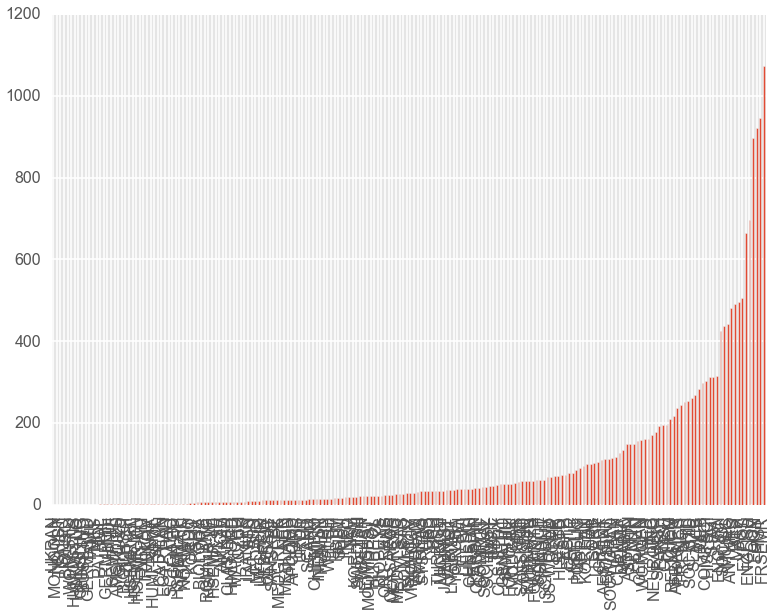

In [41]:
co = []
va = []
other = 0
for k, v in alltehcatsnw.iteritems():
    if v > 400:
        co.append(k)
        va.append(v)
 #   elif v > 1:
  #      other += v
#co.append('Other')
#va.append(other)
series = pd.Series(va, index=co, name='Unweighted Enrollment')
series.sort()
print co
print va
print series

series.plot(kind='bar')#, figsize=(6, 6))

['SOCWORLD', 'ECON', 'CHEM', 'CHNSE', 'RELIGION', 'BIOSTAT', 'HAA', 'APMTH', 'SPANSH', 'SOC-STD', 'STAT', 'FRENCH', 'LING', 'ENGLISH', 'AFRAMER', 'HIST', 'WOMGEN', 'SOCIOL', 'ENG-SCI', 'ASTRON', 'PSY', 'JAPAN', 'MATH', 'SLAVIC', 'HISTSCI', 'ITAL', 'PHYSICS', 'LATIN', 'PHIL', 'E-PSCI', 'VES', 'GERMAN', 'DRAMA', 'COMPSCI', 'HEB', 'NEUROBIO', 'SCRB', 'OEB', 'FRSEMR', 'LIT-ART', 'GOV', 'MCB', 'GREEK', 'ANTHRO', 'CULTBLF', 'EXPOS', 'MUSIC', 'ARABIC', 'AESTHINT']
[115, 921, 209, 196, 218, 113, 314, 150, 192, 262, 312, 252, 172, 697, 237, 945, 160, 438, 426, 149, 506, 118, 496, 268, 312, 101, 244, 155, 253, 196, 490, 159, 135, 304, 161, 179, 102, 298, 1072, 104, 896, 284, 110, 480, 127, 664, 441, 148, 112]
ITAL         101
SCRB         102
LIT-ART      104
GREEK        110
AESTHINT     112
BIOSTAT      113
SOCWORLD     115
JAPAN        118
CULTBLF      127
DRAMA        135
ARABIC       148
ASTRON       149
APMTH        150
LATIN        155
GERMAN       159
WOMGEN       160
HEB          161
LI

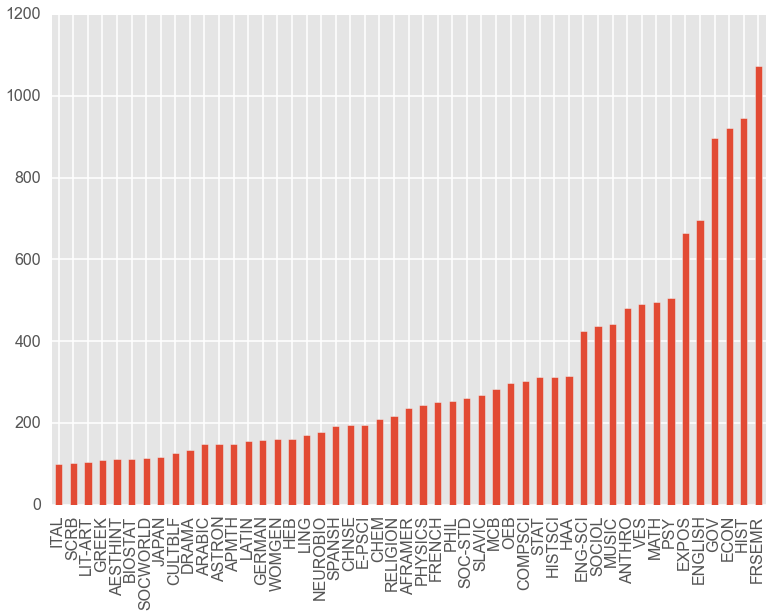

In [43]:
co = []
va = []
other = 0
for k, v in alltehcatsnw.iteritems():
    if v > 100:
        co.append(k)
        va.append(v)
 #   elif v > 1:
  #      other += v
#co.append('Other')
#va.append(other)
series = pd.Series(va, index=co, name='Unweighted Enrollment')
series.sort()
print co
print va
print series

series.plot(kind='bar')#, figsize=(6, 6))

['SOCWORLD', 'CHNSE', 'RELIGION', 'HAA', 'APMTH', 'SPANSH', 'SOC-STD', 'STAT', 'FRENCH', 'ENGLISH', 'ETHRSON', 'AFRAMER', 'SCIENCE', 'PSY', 'MOR-REAS', 'SOC-ANAL', 'HISTSCI', 'LIFESCI', 'SCIPHUNV', 'SCILIVSY', 'PHYSICS', 'PHIL', 'VES', 'COMPSCI', 'HEB', 'OEB', 'FRSEMR', 'LIT-ART', 'GOV', 'PHYSCI', 'MCB', 'CULTBLF', 'EXPOS', 'MUSIC', 'ARABIC', 'HIS-STD', 'AESTHINT', 'US-WORLD']
[7547.0, 6277.0, 3469.0, 6945.0, 6175.0, 4703.0, 4239.0, 11362.0, 5527.0, 17510.0, 7603.0, 5737.0, 5402.0, 14150.0, 4375.0, 7549.0, 6406.0, 10411.0, 5380.0, 3648.0, 5624.0, 4703.0, 5609.0, 15249.0, 3155.0, 5895.0, 11121.0, 9802.0, 27261.0, 7375.0, 9746.0, 9544.0, 9604.0, 7598.0, 3456.0, 6406.0, 5880.0, 4931.0]
HEB          3155
ARABIC       3456
RELIGION     3469
SCILIVSY     3648
SOC-STD      4239
MOR-REAS     4375
PHIL         4703
SPANSH       4703
US-WORLD     4931
SCIPHUNV     5380
SCIENCE      5402
FRENCH       5527
VES          5609
PHYSICS      5624
AFRAMER      5737
AESTHINT     5880
OEB          5895
AP

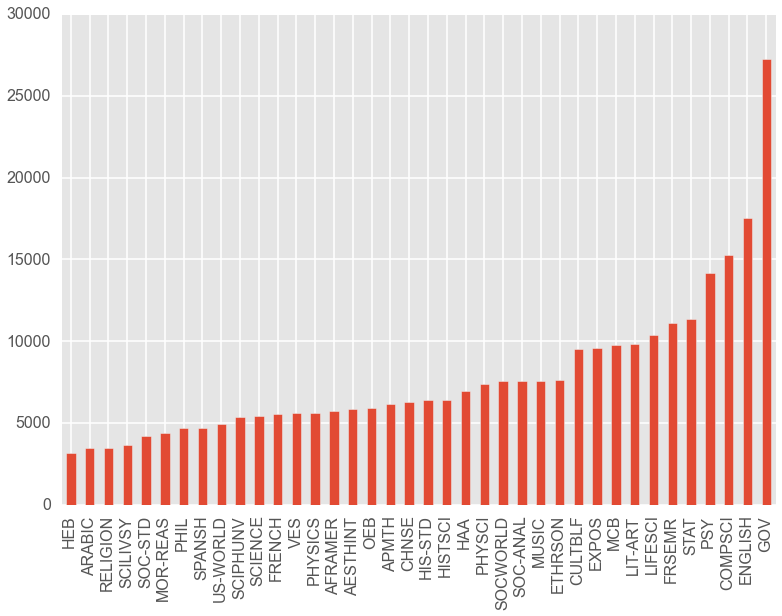

In [45]:
co = []
va = []
other = 0
for k, v in alltehcats.iteritems():
    if v > 3000:
        co.append(k)
        va.append(v)
 #   elif v > 1:
  #      other += v
#co.append('Other')
#va.append(other)
series = pd.Series(va, index=co, name='Unweighted Enrollment')
series.sort()
print co
print va
print series

series.plot(kind='bar')#, figsize=(6, 6))

In [48]:
df[df['Course Title'] == 'Justice']

Unnamed: 0 Course Category Course Number Course Title  Overall Q  Workload Q  Std Workload Q  Would Recommend Q  Enrollment  Evaluations  Response Rate  Materials Q  Assignments Q  Feedback Q  Section Q  Elective Reason  Concentration Req Reason  Secondary Field or Language Req Reason  Undeergrad Core or Gen Ed Req Reason  Expos Req Reason  Foreign Lang Req Reason  Pre-Med Req Reason  Year  Term
1606         675        MOR-REAS   MOR-REAS 22      Justice        4.0         1.8             3.9                4.1        1072          740          69.03          4.0            3.8         3.7        3.9               11                        14                                       1                                    80                 0                        0                   0  2007  Fall
2582         697        MOR-REAS   MOR-REAS 22      Justice        4.0         1.8             3.9                4.2         872          640          73.39          4.0            3.8         3.9        4.1               16                        12                                       1                                    84                 0                        0                   0  2008  Fall
4167         305         ETHRSON    ETHRSON 22      Justice        3.8         1.8             3.9                3.9         797          728          91.34          4.0            3.6         3.8        4.0               21                        21                                       3                                    74                 0                        0                   0  2010  Fall
6368         319         ETHRSON    ETHRSON 22      Justice        3.8         1.8             3.9                4.0         388          349          89.95          3.9            3.8         4.0        4.1               26                        18                                       5                                    81                 0                        0                   0  2012  Fall